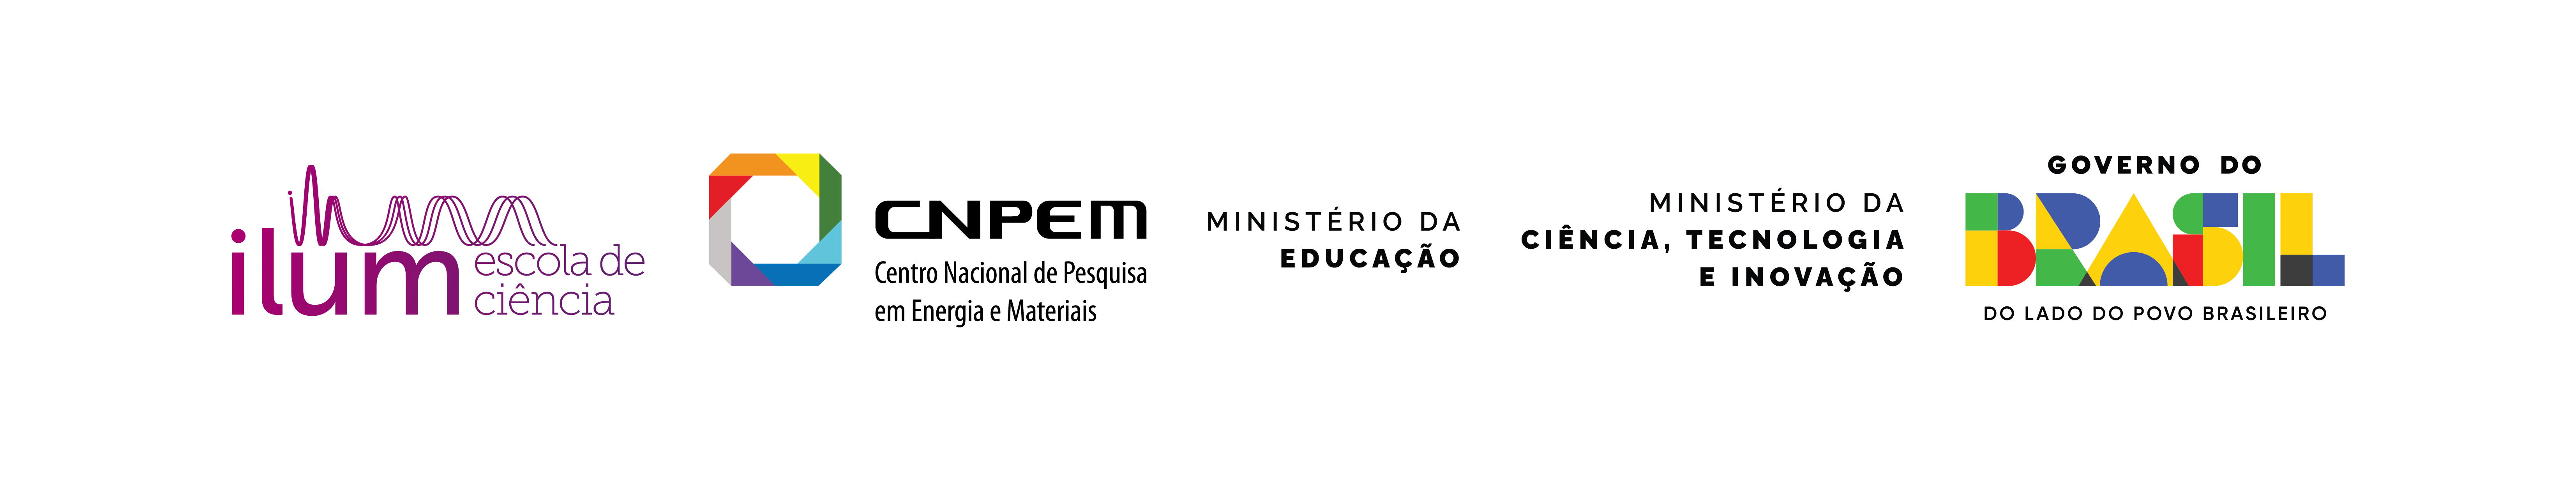

<div style="text-align: center;">

# Topologia de Polímeros
</div>

<br>
<div style="text-align: center;">
Ana Luz Pereira Mendes; Emanuel Piveta Pozzobon; Maria Clara Macedo Lelis; Pedro Coelho Gimenes de Freitas
</div>

<div style="text-align: center;">
    <i>Ilum: School Of Science, Brazilian Center for Research in Energy and Materials (CNPEM)</i>
</div>

<br>

____________

<div style="text-align: justify;"> <b>Objetivo:</b> A proposta será utilizar o ensemble canônico para, através de uma rede fixa, gerar uma quantidade N de polímeros. Com isso, sortear um dos polímeros da rede e redefinir a sua posição a partir da escolha de um novo ponto inicial, que gerará uma nova configuração por meio do algoritmo do andar do bêbado. Com esse novo estado estabelecido, calcularemos a energia do sistema, analisando sítios de interações e, assim, encontrar o equilíbrio.</div>

### Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def gerar_polimero(
    rede: np.ndarray,
    tamanho_polimero: int,
    id_polimero: int,
    MAX_TENTATIVAS: int = 10_000
) -> list[tuple[int, int]] | None:

    altura, largura = rede.shape

    # Lista atualizada de posições livres
    posicoes_livres = list(zip(*np.where(rede == 0)))
    
    # verificar caso a rede não tenha nenhum espaço com 0
    if len(posicoes_livres) == 0:
        return None   # Rede cheia

    for _ in range(MAX_TENTATIVAS):

        # Escolhe aleatoriamente entre posições disponíveis
        y_inicial, x_inicial = random.choice(posicoes_livres)

        polimero = [(x_inicial, y_inicial)]
        rede[y_inicial, x_inicial] = id_polimero
        pos_atual = (x_inicial, y_inicial)

        for _ in range(1, tamanho_polimero):
            vizinhos_possiveis = [
                (pos_atual[0] + 1, pos_atual[1]),
                (pos_atual[0] - 1, pos_atual[1]),
                (pos_atual[0], pos_atual[1] + 1),
                (pos_atual[0], pos_atual[1] - 1),
            ]

            random.shuffle(vizinhos_possiveis)

            passo_valido = False
            for prox_x, prox_y in vizinhos_possiveis:
                if (
                    0 <= prox_x < largura
                    and 0 <= prox_y < altura
                    and rede[prox_y, prox_x] == 0
                ):
                    pos_atual = (prox_x, prox_y)
                    polimero.append(pos_atual)
                    rede[prox_y, prox_x] = id_polimero
                    passo_valido = True
                    break

            if not passo_valido:
                # desfaz
                for px, py in polimero:
                    rede[py, px] = 0
                break  # tenta de novo outro ponto inicial

        else:
            return polimero  # Conseguiu gerar!

    return None  # Depois de muitas tentativas, desista.

In [3]:
def criar_rede(TAMANHO_REDE_X, TAMANHO_REDE_Y, NUMERO_DE_POLIMEROS, TAMANHO_DO_POLIMERO, MAX_TENTATIVAS):

    for i in range(MAX_TENTATIVAS):
        rede = np.zeros((TAMANHO_REDE_Y, TAMANHO_REDE_X))
        polimeros = {}

        id_atual = 1

        while id_atual <= NUMERO_DE_POLIMEROS:

            coords = gerar_polimero(rede, TAMANHO_DO_POLIMERO, id_atual, MAX_TENTATIVAS)

            if coords is None:
                break

            polimeros[id_atual] = coords
            id_atual += 1
        
        if id_atual > NUMERO_DE_POLIMEROS:
            return rede, polimeros

    raise RuntimeError("Não foi possível gerar uma rede completa após muitas tentativas.")

#### Exemplo `criar_redes:` 

É importante perceber quanod temos redes muito grandes como a maior parte dos itens usados, demorará muito para rodar uma única aplicação dessa função.

In [4]:
rede, polimeros_gerados = criar_rede(TAMANHO_REDE_X=15, 
                                     TAMANHO_REDE_Y=15, 
                                     NUMERO_DE_POLIMEROS=20, 
                                     TAMANHO_DO_POLIMERO=10, 
                                     MAX_TENTATIVAS=10_000)
# Número de espaços na rede: 225
# Número de espaços da rede usados: 200
print(rede)
print("-=-"*30)
print(polimeros_gerados)


[[ 0.  7.  7. 18. 18. 18. 18.  0. 18. 18. 18. 19. 19. 19. 19.]
 [20. 20.  7.  7.  7.  7. 18. 18. 18.  8.  8. 19.  3.  3.  3.]
 [20. 20. 20.  7.  7.  7.  7.  0.  0.  8.  8. 19.  3.  3.  3.]
 [20. 20. 20. 11.  4.  4.  4.  4.  0.  8. 19. 19.  3.  3.  3.]
 [20. 10. 10. 11.  4.  4.  0.  4.  4.  8. 19. 19.  1.  1.  3.]
 [20. 10. 11. 11.  4.  4. 11.  9.  9.  8.  8.  8.  8.  1.  1.]
 [10. 10. 11. 11. 11. 11. 11.  9.  0. 16. 16. 16. 16.  1.  1.]
 [10.  2.  6.  6.  6.  6.  6.  9.  0.  0.  0. 15. 16.  1.  1.]
 [10.  2.  6. 13. 13. 13.  6.  9.  9.  0.  0. 15. 16.  1.  1.]
 [10.  2. 13. 13. 13. 13.  6.  0.  9. 15. 15. 15. 16.  0.  0.]
 [10.  2. 13.  0. 13.  6.  6.  0.  9. 15. 15. 15. 16.  0.  0.]
 [10.  2.  2.  2. 13.  0.  5.  5.  9.  9. 15. 15. 16. 16.  0.]
 [14. 14. 14.  2.  2.  2.  5.  5.  0. 17. 17. 17. 12. 12. 12.]
 [14. 14. 14. 14.  5.  5.  5.  5.  0. 17. 17. 12. 12.  0. 12.]
 [ 0. 14. 14. 14.  5.  5. 17. 17. 17. 17. 17. 12. 12. 12. 12.]]
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-

In [5]:
def plotar_rede(rede: list[list], polimeros_coords: dict[int, list[tuple[int, int]]]):
    """
    Plota uma matriz representando a rede e os polímeros sobre ela.

    Args:
        rede (list[list]): matriz bidimensional representando a rede.
        polimeros_coords (dict[int, list[tuple[int, int]]]): 
            dicionário onde as chaves são IDs dos polímeros
            e os valores são listas de coordenadas (x, y).
    """
    
    plt.figure(figsize=(10, 10), dpi=180)
    plt.imshow(rede, origin="lower", cmap="gist_ncar_r", interpolation="nearest")

    for id_polimero, coords in polimeros_coords.items():
        if coords:
            x_coords = [c[0] for c in coords]
            y_coords = [c[1] for c in coords]
            plt.plot(
                x_coords, y_coords, "-o", markersize=3, label=f"Polímero {id_polimero}"
            )

    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.grid(False)
    plt.show()

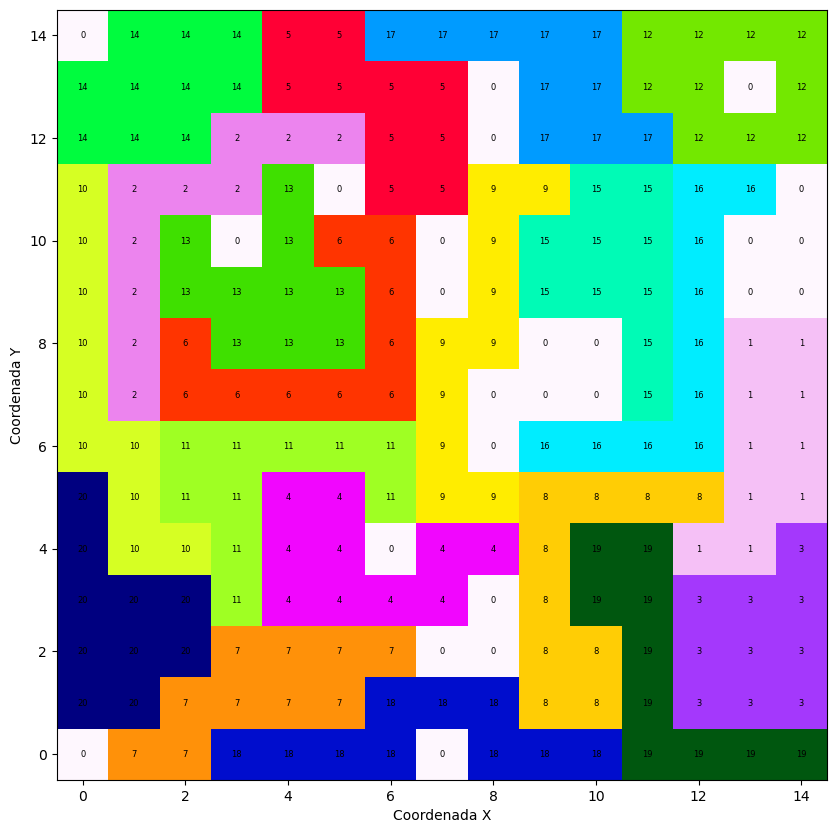

In [6]:
def plotar_rede_numeros(rede: list[list]):
    # plotar rede mostrando números
    plt.figure(figsize=(10, 10))
    # plota a figura da matriz
    plt.imshow(rede, origin="lower", cmap="gist_ncar_r", interpolation="nearest")
    for (x, y), valor in np.ndenumerate(rede):
        # printa os números diferentes de zero
        if valor != 0:
            plt.text(y, x, int(valor), ha="center", va="center", color="black", fontsize=6)
            
        # printa os zeros
        else:
            plt.text(y,x, int(valor), ha="center", va="center", color="black", fontsize=6)
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.grid(False)
    plt.show()
    
plotar_rede_numeros(rede)

A rede é a seguir:

In [7]:
print(rede)
print(rede.shape)

[[ 0.  7.  7. 18. 18. 18. 18.  0. 18. 18. 18. 19. 19. 19. 19.]
 [20. 20.  7.  7.  7.  7. 18. 18. 18.  8.  8. 19.  3.  3.  3.]
 [20. 20. 20.  7.  7.  7.  7.  0.  0.  8.  8. 19.  3.  3.  3.]
 [20. 20. 20. 11.  4.  4.  4.  4.  0.  8. 19. 19.  3.  3.  3.]
 [20. 10. 10. 11.  4.  4.  0.  4.  4.  8. 19. 19.  1.  1.  3.]
 [20. 10. 11. 11.  4.  4. 11.  9.  9.  8.  8.  8.  8.  1.  1.]
 [10. 10. 11. 11. 11. 11. 11.  9.  0. 16. 16. 16. 16.  1.  1.]
 [10.  2.  6.  6.  6.  6.  6.  9.  0.  0.  0. 15. 16.  1.  1.]
 [10.  2.  6. 13. 13. 13.  6.  9.  9.  0.  0. 15. 16.  1.  1.]
 [10.  2. 13. 13. 13. 13.  6.  0.  9. 15. 15. 15. 16.  0.  0.]
 [10.  2. 13.  0. 13.  6.  6.  0.  9. 15. 15. 15. 16.  0.  0.]
 [10.  2.  2.  2. 13.  0.  5.  5.  9.  9. 15. 15. 16. 16.  0.]
 [14. 14. 14.  2.  2.  2.  5.  5.  0. 17. 17. 17. 12. 12. 12.]
 [14. 14. 14. 14.  5.  5.  5.  5.  0. 17. 17. 12. 12.  0. 12.]
 [ 0. 14. 14. 14.  5.  5. 17. 17. 17. 17. 17. 12. 12. 12. 12.]]
(15, 15)


Lembre-se que as posições aqui estão em (x, y) ou (coluna, linha)

In [8]:
for chave, valor in polimeros_gerados.items():
    print(f'Polímero {chave}: {valor}')
    

Polímero 1: [(12, 4), (13, 4), (13, 5), (14, 5), (14, 6), (13, 6), (13, 7), (14, 7), (14, 8), (13, 8)]
Polímero 2: [(5, 12), (4, 12), (3, 12), (3, 11), (2, 11), (1, 11), (1, 10), (1, 9), (1, 8), (1, 7)]
Polímero 3: [(14, 1), (14, 2), (13, 2), (13, 1), (12, 1), (12, 2), (12, 3), (13, 3), (14, 3), (14, 4)]
Polímero 4: [(5, 4), (5, 5), (4, 5), (4, 4), (4, 3), (5, 3), (6, 3), (7, 3), (7, 4), (8, 4)]
Polímero 5: [(5, 14), (4, 14), (4, 13), (5, 13), (6, 13), (7, 13), (7, 12), (7, 11), (6, 11), (6, 12)]
Polímero 6: [(5, 10), (6, 10), (6, 9), (6, 8), (6, 7), (5, 7), (4, 7), (3, 7), (2, 7), (2, 8)]
Polímero 7: [(6, 2), (5, 2), (5, 1), (4, 1), (4, 2), (3, 2), (3, 1), (2, 1), (2, 0), (1, 0)]
Polímero 8: [(12, 5), (11, 5), (10, 5), (9, 5), (9, 4), (9, 3), (9, 2), (9, 1), (10, 1), (10, 2)]
Polímero 9: [(9, 11), (8, 11), (8, 10), (8, 9), (8, 8), (7, 8), (7, 7), (7, 6), (7, 5), (8, 5)]
Polímero 10: [(0, 11), (0, 10), (0, 9), (0, 8), (0, 7), (0, 6), (1, 6), (1, 5), (1, 4), (2, 4)]
Polímero 11: [(6, 5)

Aqui já está em (linha, coluna)

In [9]:
rede[3][4]

4.0

Vamos criar uma matriz de zeros

In [10]:
D = np.zeros((3,3))
print(D)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [11]:
# np.pad adiciona bordas a matriz, bordas iguais a zero
rede_pad = np.pad(rede, pad_width=1, mode='constant', constant_values=0)
print(rede_pad)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  7.  7. 18. 18. 18. 18.  0. 18. 18. 18. 19. 19. 19. 19.  0.]
 [ 0. 20. 20.  7.  7.  7.  7. 18. 18. 18.  8.  8. 19.  3.  3.  3.  0.]
 [ 0. 20. 20. 20.  7.  7.  7.  7.  0.  0.  8.  8. 19.  3.  3.  3.  0.]
 [ 0. 20. 20. 20. 11.  4.  4.  4.  4.  0.  8. 19. 19.  3.  3.  3.  0.]
 [ 0. 20. 10. 10. 11.  4.  4.  0.  4.  4.  8. 19. 19.  1.  1.  3.  0.]
 [ 0. 20. 10. 11. 11.  4.  4. 11.  9.  9.  8.  8.  8.  8.  1.  1.  0.]
 [ 0. 10. 10. 11. 11. 11. 11. 11.  9.  0. 16. 16. 16. 16.  1.  1.  0.]
 [ 0. 10.  2.  6.  6.  6.  6.  6.  9.  0.  0.  0. 15. 16.  1.  1.  0.]
 [ 0. 10.  2.  6. 13. 13. 13.  6.  9.  9.  0.  0. 15. 16.  1.  1.  0.]
 [ 0. 10.  2. 13. 13. 13. 13.  6.  0.  9. 15. 15. 15. 16.  0.  0.  0.]
 [ 0. 10.  2. 13.  0. 13.  6.  6.  0.  9. 15. 15. 15. 16.  0.  0.  0.]
 [ 0. 10.  2.  2.  2. 13.  0.  5.  5.  9.  9. 15. 15. 16. 16.  0.  0.]
 [ 0. 14. 14. 14.  2.  2.  2.  5.  5.  0. 17. 17. 17. 12. 12. 12.  0.]
 [ 0. 

### Vamos printar kerneis que representem a vizinhança de cada átomo do polímero

In [12]:
for chave, valor in polimeros_gerados.items():
    for v in valor:
        print(v)
        x, y = v 
        campo = rede_pad[y:y+3, x:x+3]
        print(f"Polímero {chave} na posição {v} tem vizinhança:\n{campo}\n")

(12, 4)
Polímero 1 na posição (12, 4) tem vizinhança:
[[19.  3.  3.]
 [19.  1.  1.]
 [ 8.  8.  1.]]

(13, 4)
Polímero 1 na posição (13, 4) tem vizinhança:
[[3. 3. 3.]
 [1. 1. 3.]
 [8. 1. 1.]]

(13, 5)
Polímero 1 na posição (13, 5) tem vizinhança:
[[ 1.  1.  3.]
 [ 8.  1.  1.]
 [16.  1.  1.]]

(14, 5)
Polímero 1 na posição (14, 5) tem vizinhança:
[[1. 3. 0.]
 [1. 1. 0.]
 [1. 1. 0.]]

(14, 6)
Polímero 1 na posição (14, 6) tem vizinhança:
[[1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]]

(13, 6)
Polímero 1 na posição (13, 6) tem vizinhança:
[[ 8.  1.  1.]
 [16.  1.  1.]
 [16.  1.  1.]]

(13, 7)
Polímero 1 na posição (13, 7) tem vizinhança:
[[16.  1.  1.]
 [16.  1.  1.]
 [16.  1.  1.]]

(14, 7)
Polímero 1 na posição (14, 7) tem vizinhança:
[[1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]]

(14, 8)
Polímero 1 na posição (14, 8) tem vizinhança:
[[1. 1. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]

(13, 8)
Polímero 1 na posição (13, 8) tem vizinhança:
[[16.  1.  1.]
 [16.  1.  1.]
 [16.  0.  0.]]

(5, 12)
Polímero 2 na posição (5, 1

Vizinhos da diagonal de um número no centro de uma matriz 3x3

In [13]:
campo = np.array([
    [9, 4, 7],
    [2, 1, 3],
    [8, 6, 5]])
print(campo)
print(campo[(0,2)])

vizinhos_possiveis_diagonal = [campo[(0,0)],campo[(0,2)],campo[(2,0)],campo[(2,2)]]
print(vizinhos_possiveis_diagonal)

[[9 4 7]
 [2 1 3]
 [8 6 5]]
7
[9, 7, 8, 5]


In [14]:
def calcula_energia_sistema(rede: list[list], polimeros_gerados: dict[int, list[list]], EAl=1, EAd=1, EBl=1, EBd=1):
    """_Função que calcula a energia de uma rede_

    Args:
        rede (list[list]): unidade de rede
        polimeros_gerados (dict[int, list[list]]): polímeros da rede
        EAl (int, optional): Defaults to 1.
        EAd (int, optional): Defaults to 1.
        EBl (int, optional): Defaults to 1.
        EBd (int, optional): Defaults to 1.

    Returns:
        list[]: uma lista de 4 itens respectivamente: dicionario, rede, Energia_total, lista_energia
    """

    Energia_total = 0

    dicionario = dict()
    lista_energia = []
    for chave, valor in polimeros_gerados.items():
        i = 0 
        passo = 0
        dicionario[chave] = {'frontais': 0, 
                            'diagonais': 0,
                            'diferentes frontais': 0,
                            'diferentes diagonais': 0,}
        energia_iteracao = 0 
        for v in valor:
            # cria uma cópia
            rede_copia = np.copy(rede)
            y, x = v 

            # zera o ponto na matriz onde vc está
            rede_copia[v[1], v[0]] = 0
            
            if passo != 0: 
                ant = valor[passo-1]
                # Zera o anterior
                rede_copia[ant[1], ant[0]] = 0
                
            if passo != len(valor)-1:
                prox = valor[passo+1]
                # Zera o próximo
                rede_copia[prox[1], prox[0]] = 0
            
            passo += 1

            # Cria rede pad
            rede_pad = np.pad(rede_copia, pad_width=1, mode='constant', constant_values=0)
            # Cria Karnel
            campo = rede_pad[x:x+3, y:y+3]

            rede_pad2 = np.pad(rede, pad_width=1, mode='constant', constant_values=0)
            campo2 = rede_pad2[x:x+3, y:y+3]
            
            #Calcular energia das interações laterais
            vizinhos_possiveis_laterais = [(0,1),(1,0),(1,2),(2,1)]
            
            for coord in vizinhos_possiveis_laterais:
                campo_valor = campo[coord]
                
                if campo_valor == 0:
                    Energia_total += 0
                    energia_iteracao += 0 
                
                elif campo_valor == chave:
                    Energia_total += EAl
                    energia_iteracao += EAl
                    dicionario[chave]['frontais'] += 1
                
                else:
                    Energia_total += EBl
                    energia_iteracao += EBl
                    dicionario[chave]['diferentes frontais'] += 1
                    
            #Calcular energia das interações diagonais
            vizinhos_possiveis_diagonais = [(0,0),(0,2),(2,0),(2,2)]
            
            for coord_d in vizinhos_possiveis_diagonais:
                campo_valor = campo[coord_d]

                if campo_valor == 0:
                    Energia_total += 0
                    energia_iteracao += 0
                
                elif campo_valor == chave:
                    Energia_total += EAd
                    energia_iteracao += EAd
                    dicionario[chave]['diagonais'] += 1

                else:
                    Energia_total += EBd
                    energia_iteracao += EBd
                    dicionario[chave]['diferentes diagonais'] += 1

        dicionario[chave]['frontais'] /= 2
        dicionario[chave]['diagonais'] /= 2
        lista_energia.append(energia_iteracao/2)
        
    Energia_total = Energia_total/2

    return dicionario, rede, Energia_total, lista_energia
    
teste = calcula_energia_sistema(rede, polimeros_gerados)
print(f"dicionário: {teste[0]}")
print(f"rede:\n{teste[1]}")
print(f"Energia total: {teste[2]}")
print(f"Lista de energia: {teste[3]}")

dicionário: {1: {'frontais': 3.0, 'diagonais': 8.0, 'diferentes frontais': 10, 'diferentes diagonais': 14}, 2: {'frontais': 0.0, 'diagonais': 3.0, 'diferentes frontais': 20, 'diferentes diagonais': 32}, 3: {'frontais': 4.0, 'diagonais': 9.0, 'diferentes frontais': 10, 'diferentes diagonais': 14}, 4: {'frontais': 2.0, 'diagonais': 7.0, 'diferentes frontais': 12, 'diferentes diagonais': 20}, 5: {'frontais': 3.0, 'diagonais': 8.0, 'diferentes frontais': 10, 'diferentes diagonais': 15}, 6: {'frontais': 0.0, 'diagonais': 3.0, 'diferentes frontais': 19, 'diferentes diagonais': 30}, 7: {'frontais': 2.0, 'diagonais': 8.0, 'diferentes frontais': 14, 'diferentes diagonais': 20}, 8: {'frontais': 1.0, 'diagonais': 4.0, 'diferentes frontais': 18, 'diferentes diagonais': 27}, 9: {'frontais': 0.0, 'diagonais': 4.0, 'diferentes frontais': 13, 'diferentes diagonais': 20}, 10: {'frontais': 0.0, 'diagonais': 3.0, 'diferentes frontais': 16, 'diferentes diagonais': 22}, 11: {'frontais': 1.0, 'diagonais': 5

------------

In [15]:
print(rede)

[[ 0.  7.  7. 18. 18. 18. 18.  0. 18. 18. 18. 19. 19. 19. 19.]
 [20. 20.  7.  7.  7.  7. 18. 18. 18.  8.  8. 19.  3.  3.  3.]
 [20. 20. 20.  7.  7.  7.  7.  0.  0.  8.  8. 19.  3.  3.  3.]
 [20. 20. 20. 11.  4.  4.  4.  4.  0.  8. 19. 19.  3.  3.  3.]
 [20. 10. 10. 11.  4.  4.  0.  4.  4.  8. 19. 19.  1.  1.  3.]
 [20. 10. 11. 11.  4.  4. 11.  9.  9.  8.  8.  8.  8.  1.  1.]
 [10. 10. 11. 11. 11. 11. 11.  9.  0. 16. 16. 16. 16.  1.  1.]
 [10.  2.  6.  6.  6.  6.  6.  9.  0.  0.  0. 15. 16.  1.  1.]
 [10.  2.  6. 13. 13. 13.  6.  9.  9.  0.  0. 15. 16.  1.  1.]
 [10.  2. 13. 13. 13. 13.  6.  0.  9. 15. 15. 15. 16.  0.  0.]
 [10.  2. 13.  0. 13.  6.  6.  0.  9. 15. 15. 15. 16.  0.  0.]
 [10.  2.  2.  2. 13.  0.  5.  5.  9.  9. 15. 15. 16. 16.  0.]
 [14. 14. 14.  2.  2.  2.  5.  5.  0. 17. 17. 17. 12. 12. 12.]
 [14. 14. 14. 14.  5.  5.  5.  5.  0. 17. 17. 12. 12.  0. 12.]
 [ 0. 14. 14. 14.  5.  5. 17. 17. 17. 17. 17. 12. 12. 12. 12.]]


---------

### Algoritmo Metrópolis:


In [16]:
direcoes = [(1,0), (-1,0), (0,1), (0,-1)]
dx, dy = random.choice(direcoes)
print(dx)
print(dy)

-1
0


In [17]:
import random
import copy

def passo_metro_polimero(rede: list[list], 
                         polimeros_gerados: dict[int,
                        list[list]], 
                         T: int,
                         TAMANHO_DO_POLIMERO: int,
                         MAX_TENTATIVAS: int =10_000,
                         EAl=1,
                         EAd=1,
                         EBl=1,
                         EBd=1,):
    """ Executa um passo do algoritmo de Metrópolis no ensemble canônico
    para um sistema de polímeros em rede.

    Args:
        rede (list[list]): _description_
        polimeros_gerados (dict[int, list[list]]): _description_
        T (int): _description_
        EAl (int, optional): _description_. Defaults to 1.
        EAd (int, optional): _description_. Defaults to 1.
        EBl (int, optional): _description_. Defaults to 1.
        EBd (int, optional): _description_. Defaults to 1.

    Returns:
        rede_passo: rede alterada
        polimeros_gerados: dicionário com as posições dos polímeros alteradas
    """
    polimeros_originais = copy.deepcopy(polimeros_gerados)
    
    # Calcular a energia inicial do sistema
    _, _, E_antiga, _ = calcula_energia_sistema(rede, polimeros_originais, EAl, EAd, EBl, EBd)

    # Escolher um polímero aleatório
    id_escolhido = random.choice(list(polimeros_gerados.keys()))
    polimero_antigo = polimeros_gerados[id_escolhido]

    # Remover temporariamente o polímero da rede
    rede_nova = copy.deepcopy(rede)

    for i in range(len(rede_nova)):
        for j in range(len(rede_nova[i])):
            if rede_nova[i][j] == id_escolhido:
                rede_nova[i][j] = 0

    # Aplicar a função para gerar um único polímero
    coordenadas = gerar_polimero(rede_nova, TAMANHO_DO_POLIMERO, id_escolhido, MAX_TENTATIVAS)

    if coordenadas:
        polimeros_gerados[id_escolhido] = coordenadas
        
        for x, y in coordenadas:
            rede_nova[y][x] = id_escolhido
            
    if not coordenadas:
        return rede, polimeros_originais

    # Calcular energia apos modificação    
    _, _, E_nova, _ = calcula_energia_sistema(rede_nova, polimeros_gerados, EAl, EAd, EBl, EBd)


    # Calcular variação de energia
    dE = E_nova - E_antiga

    # 9. Critério de aceitação de Metrópolis (ensemble canônico)
    probabilidade = np.random.rand()

    if dE <= 0 or probabilidade < np.exp(-dE / T):
        return rede_nova, polimeros_gerados
    else:
        polimeros_gerados[id_escolhido] = polimero_antigo
        return rede, polimeros_originais


#### Exemplo: criar rede e calcular sua energia com base na temperatura e energias de ligação

In [18]:
rede, polimeros_gerados = criar_rede(TAMANHO_REDE_X=10, 
                                     TAMANHO_REDE_Y=10, 
                                     NUMERO_DE_POLIMEROS=10, 
                                     TAMANHO_DO_POLIMERO=9, 
                                     MAX_TENTATIVAS=10_000)
print(rede)
print(polimeros_gerados)

[[10. 10. 10. 10. 10. 10. 10.  5.  5.  0.]
 [10. 10.  1.  2.  2.  0.  5.  5.  5.  5.]
 [ 1.  1.  1.  2.  2.  0.  5.  5.  0.  5.]
 [ 1.  1.  1.  2.  2.  2.  2.  2.  7.  7.]
 [ 1.  1.  4.  4.  4.  4.  7.  7.  7.  7.]
 [ 9.  9.  4.  4.  4.  0.  0.  7.  7.  7.]
 [ 9.  9.  0.  4.  4.  8.  8.  8.  8.  0.]
 [ 9.  3.  3.  3.  3.  3.  6.  6.  8.  8.]
 [ 9.  3.  3.  0.  3.  3.  6.  6.  8.  8.]
 [ 9.  9.  9.  6.  6.  6.  6.  6.  8.  0.]]
{1: [(2, 1), (2, 2), (2, 3), (1, 3), (1, 4), (0, 4), (0, 3), (0, 2), (1, 2)], 2: [(4, 2), (4, 1), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3)], 3: [(1, 7), (1, 8), (2, 8), (2, 7), (3, 7), (4, 7), (5, 7), (5, 8), (4, 8)], 4: [(2, 5), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (4, 5), (4, 4), (5, 4)], 5: [(9, 2), (9, 1), (8, 1), (8, 0), (7, 0), (7, 1), (6, 1), (6, 2), (7, 2)], 6: [(7, 9), (7, 8), (7, 7), (6, 7), (6, 8), (6, 9), (5, 9), (4, 9), (3, 9)], 7: [(7, 5), (8, 5), (9, 5), (9, 4), (9, 3), (8, 3), (8, 4), (7, 4), (6, 4)], 8: [(5, 6), (6, 6), (7, 6), (

In [19]:
rede_nova, polimeros_gerados_novos = passo_metro_polimero(rede, 
                                                          polimeros_gerados, 
                                                          T=200, 
                                                          TAMANHO_DO_POLIMERO=4,
                                                          MAX_TENTATIVAS=10_000,
                                                          EAl=1, EAd=1, EBl=1, EBd=1,
                                                          )
print(rede_nova)
print(polimeros_gerados)

[[ 0.  0.  0.  0. 10. 10.  0.  5.  5.  0.]
 [ 0.  0.  1.  2.  2. 10.  5.  5.  5.  5.]
 [ 1.  1.  1.  2.  2. 10.  5.  5.  0.  5.]
 [ 1.  1.  1.  2.  2.  2.  2.  2.  7.  7.]
 [ 1.  1.  4.  4.  4.  4.  7.  7.  7.  7.]
 [ 9.  9.  4.  4.  4.  0.  0.  7.  7.  7.]
 [ 9.  9.  0.  4.  4.  8.  8.  8.  8.  0.]
 [ 9.  3.  3.  3.  3.  3.  6.  6.  8.  8.]
 [ 9.  3.  3.  0.  3.  3.  6.  6.  8.  8.]
 [ 9.  9.  9.  6.  6.  6.  6.  6.  8.  0.]]
{1: [(2, 1), (2, 2), (2, 3), (1, 3), (1, 4), (0, 4), (0, 3), (0, 2), (1, 2)], 2: [(4, 2), (4, 1), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3)], 3: [(1, 7), (1, 8), (2, 8), (2, 7), (3, 7), (4, 7), (5, 7), (5, 8), (4, 8)], 4: [(2, 5), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (4, 5), (4, 4), (5, 4)], 5: [(9, 2), (9, 1), (8, 1), (8, 0), (7, 0), (7, 1), (6, 1), (6, 2), (7, 2)], 6: [(7, 9), (7, 8), (7, 7), (6, 7), (6, 8), (6, 9), (5, 9), (4, 9), (3, 9)], 7: [(7, 5), (8, 5), (9, 5), (9, 4), (9, 3), (8, 3), (8, 4), (7, 4), (6, 4)], 8: [(5, 6), (6, 6), (7, 6), (

In [20]:
from tqdm import tqdm
from IPython.display import HTML

In [21]:
def simular(TAMANHO_REDE_X, 
            TAMANHO_REDE_Y, 
            NUMERO_DE_POLIMEROS, 
            TAMANHO_DO_POLIMERO, 
            temps, 
            equil_steps, 
            prod_steps,
            MAX_TENTATIVAS=10_000,
            EAl=1, EAd=1, EBl=1, EBd=1):
    Energia_media = []

    for T in tqdm(temps):
        rede, polimeros_gerados = criar_rede(TAMANHO_REDE_X=TAMANHO_REDE_X, 
                                             TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                                             NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                                             TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                                             MAX_TENTATIVAS=MAX_TENTATIVAS)
        # Equilibração
        for _ in range(equil_steps):
            passo_metro_polimero(rede, polimeros_gerados, T, TAMANHO_DO_POLIMERO, MAX_TENTATIVAS, EAl, EAd, EBl, EBd)

        energias = []
        for _ in range(prod_steps):
            passo_metro_polimero(rede, polimeros_gerados, T, TAMANHO_DO_POLIMERO, MAX_TENTATIVAS, EAl, EAd, EBl, EBd)
            _,_,e,_ = calcula_energia_sistema(rede, polimeros_gerados)
            
            energias.append(e)

        # Energia média na temperatura T
        energia_media_T = np.mean(energias)
        Energia_media.append(energia_media_T)

    return Energia_media

#### Exemplo de funcionamento da função simular e sua plotagem

In [22]:
temps = np.linspace(0.1, 10, 30)
energia_media  = simular(
                        TAMANHO_REDE_X=10, 
                        TAMANHO_REDE_Y=10, 
                        NUMERO_DE_POLIMEROS=7, 
                        TAMANHO_DO_POLIMERO=10,
                        temps = temps,
                        equil_steps=100, 
                        prod_steps=100,
                        EAl=5, EAd=1, EBl=5, EBd=1)

100%|██████████| 30/30 [00:20<00:00,  1.47it/s]


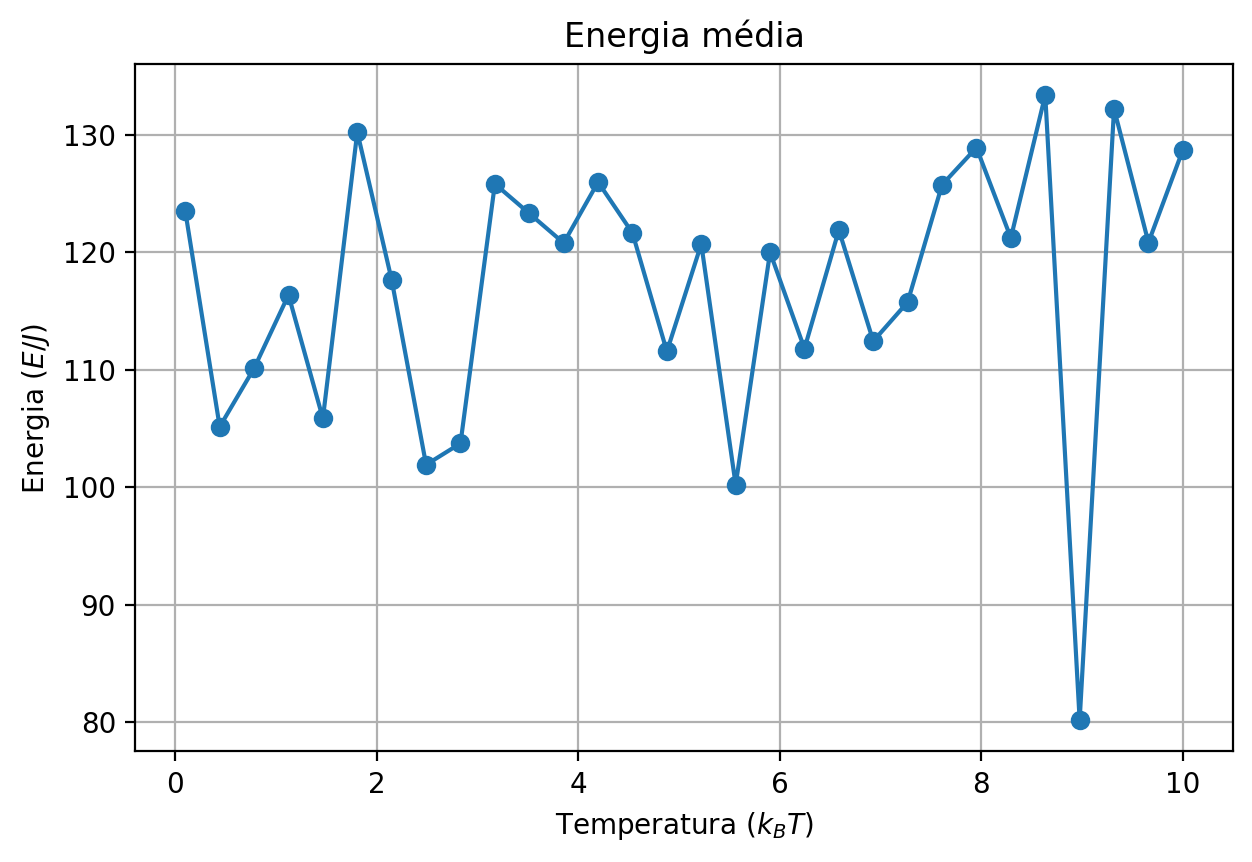

In [23]:
plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(temps, energia_media, '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

### Animação, isso é apenas um teste, nada relacionado ao que foi feito acima

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.colors import ListedColormap
def animar(T, steps,
           TAMANHO_REDE_X=10,
           TAMANHO_REDE_Y=10,
           NUMERO_DE_POLIMEROS=9,
           TAMANHO_DO_POLIMERO=10,
           MAX_TENTATIVAS=10_000,
           EAl=1, EAd=1, EBl=1, EBd=1):

    # Criar rede e polímeros
    rede, polimeros_gerados = criar_rede(
        TAMANHO_REDE_X=TAMANHO_REDE_X, 
        TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
        NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
        TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
        MAX_TENTATIVAS=MAX_TENTATIVAS
    )

    # Colormap para IDs
    n_polimeros = len(polimeros_gerados)
    cores = ["white"] + plt.cm.tab10(np.linspace(0, 1, n_polimeros)).tolist()
    cmap = ListedColormap(cores)

    fig, ax = plt.subplots(figsize=(5, 5))
    img = ax.imshow(rede, cmap=cmap, vmin=0, vmax=n_polimeros)

    ax.set_title(f"T = {T}")
    ax.set_xlabel("Coordenada X")
    ax.set_ylabel("Coordenada Y")

    # Criar textos dentro das células
    textos = []
    altura, largura = rede.shape

    for y in range(altura):
        for x in range(largura):
            val = int(rede[y, x])
            color = "black" if val == 0 else "white"
            t = ax.text(x, y, val, ha="center", va="center", 
                        color=color, fontsize=6)
            textos.append(t)

    # Atualização da animação
    def update(frame):
        nonlocal rede, polimeros_gerados

        # Passo de Metropolis 
        rede, polimeros_gerados = passo_metro_polimero(
            rede, polimeros_gerados, T, TAMANHO_DO_POLIMERO,
            MAX_TENTATIVAS,
            EAl, EAd, EBl, EBd
        )

        img.set_data(rede)

        # Atualizar números
        idx = 0
        for y in range(altura):
            for x in range(largura):
                val = int(rede[y, x])
                textos[idx].set_text(val)
                textos[idx].set_color("black" if val == 0 else "white")
                idx += 1

        return [img, *textos]

    ani = animation.FuncAnimation(
        fig, update, frames=steps, blit=True, interval=200
    )

    plt.close(fig)
    return HTML(ani.to_jshtml())
animar(0.5, 100)


------------------

## Testes com o HPC:

#### Temperatura ir de 0 até 1.000 em várias etapas

100%|██████████| 10/10 [15:31<00:00, 93.19s/it]


{0: [155.2358, 170.9079, 154.79255, 152.97985, 122.76705, 78.78245, 141.96455, 152.05845, 163.89735, 124.6812], 10: [143.2721, 147.19955, 155.3676, 131.9296, 123.57725, 166.65345, 150.44145, 153.4261, 171.0887, 137.9374], 20: [170.97595, 140.55375, 165.1267, 172.61775, 167.476, 154.8624, 158.5865, 167.0823, 179.52895, 176.88625], 40: [156.5407, 159.4949, 156.08795, 156.99825, 143.6848, 182.947, 178.11165, 157.69725, 187.8295, 157.25625], 60: [146.2416, 137.45585, 147.9038, 158.93545, 155.6349, 175.3389, 159.3619, 173.3937, 182.5243, 183.17995], 80: [127.50895, 166.3569, 189.13085, 173.8462, 155.80465, 182.96845, 175.90925, 159.447, 179.50945, 158.96395], 100: [153.94695, 166.6005, 170.2253, 150.3052, 174.05235, 152.25415, 170.53605, 164.2585, 182.81145, 193.5752], 200: [131.95565, 141.0576, 167.29505, 175.30805, 142.64535, 178.27705, 184.92315, 164.089, 143.85745, 172.6089], 400: [162.5669, 113.99625, 189.44585, 192.66705, 165.9478, 156.4109, 158.4254, 149.12885, 147.98895, 165.09745],

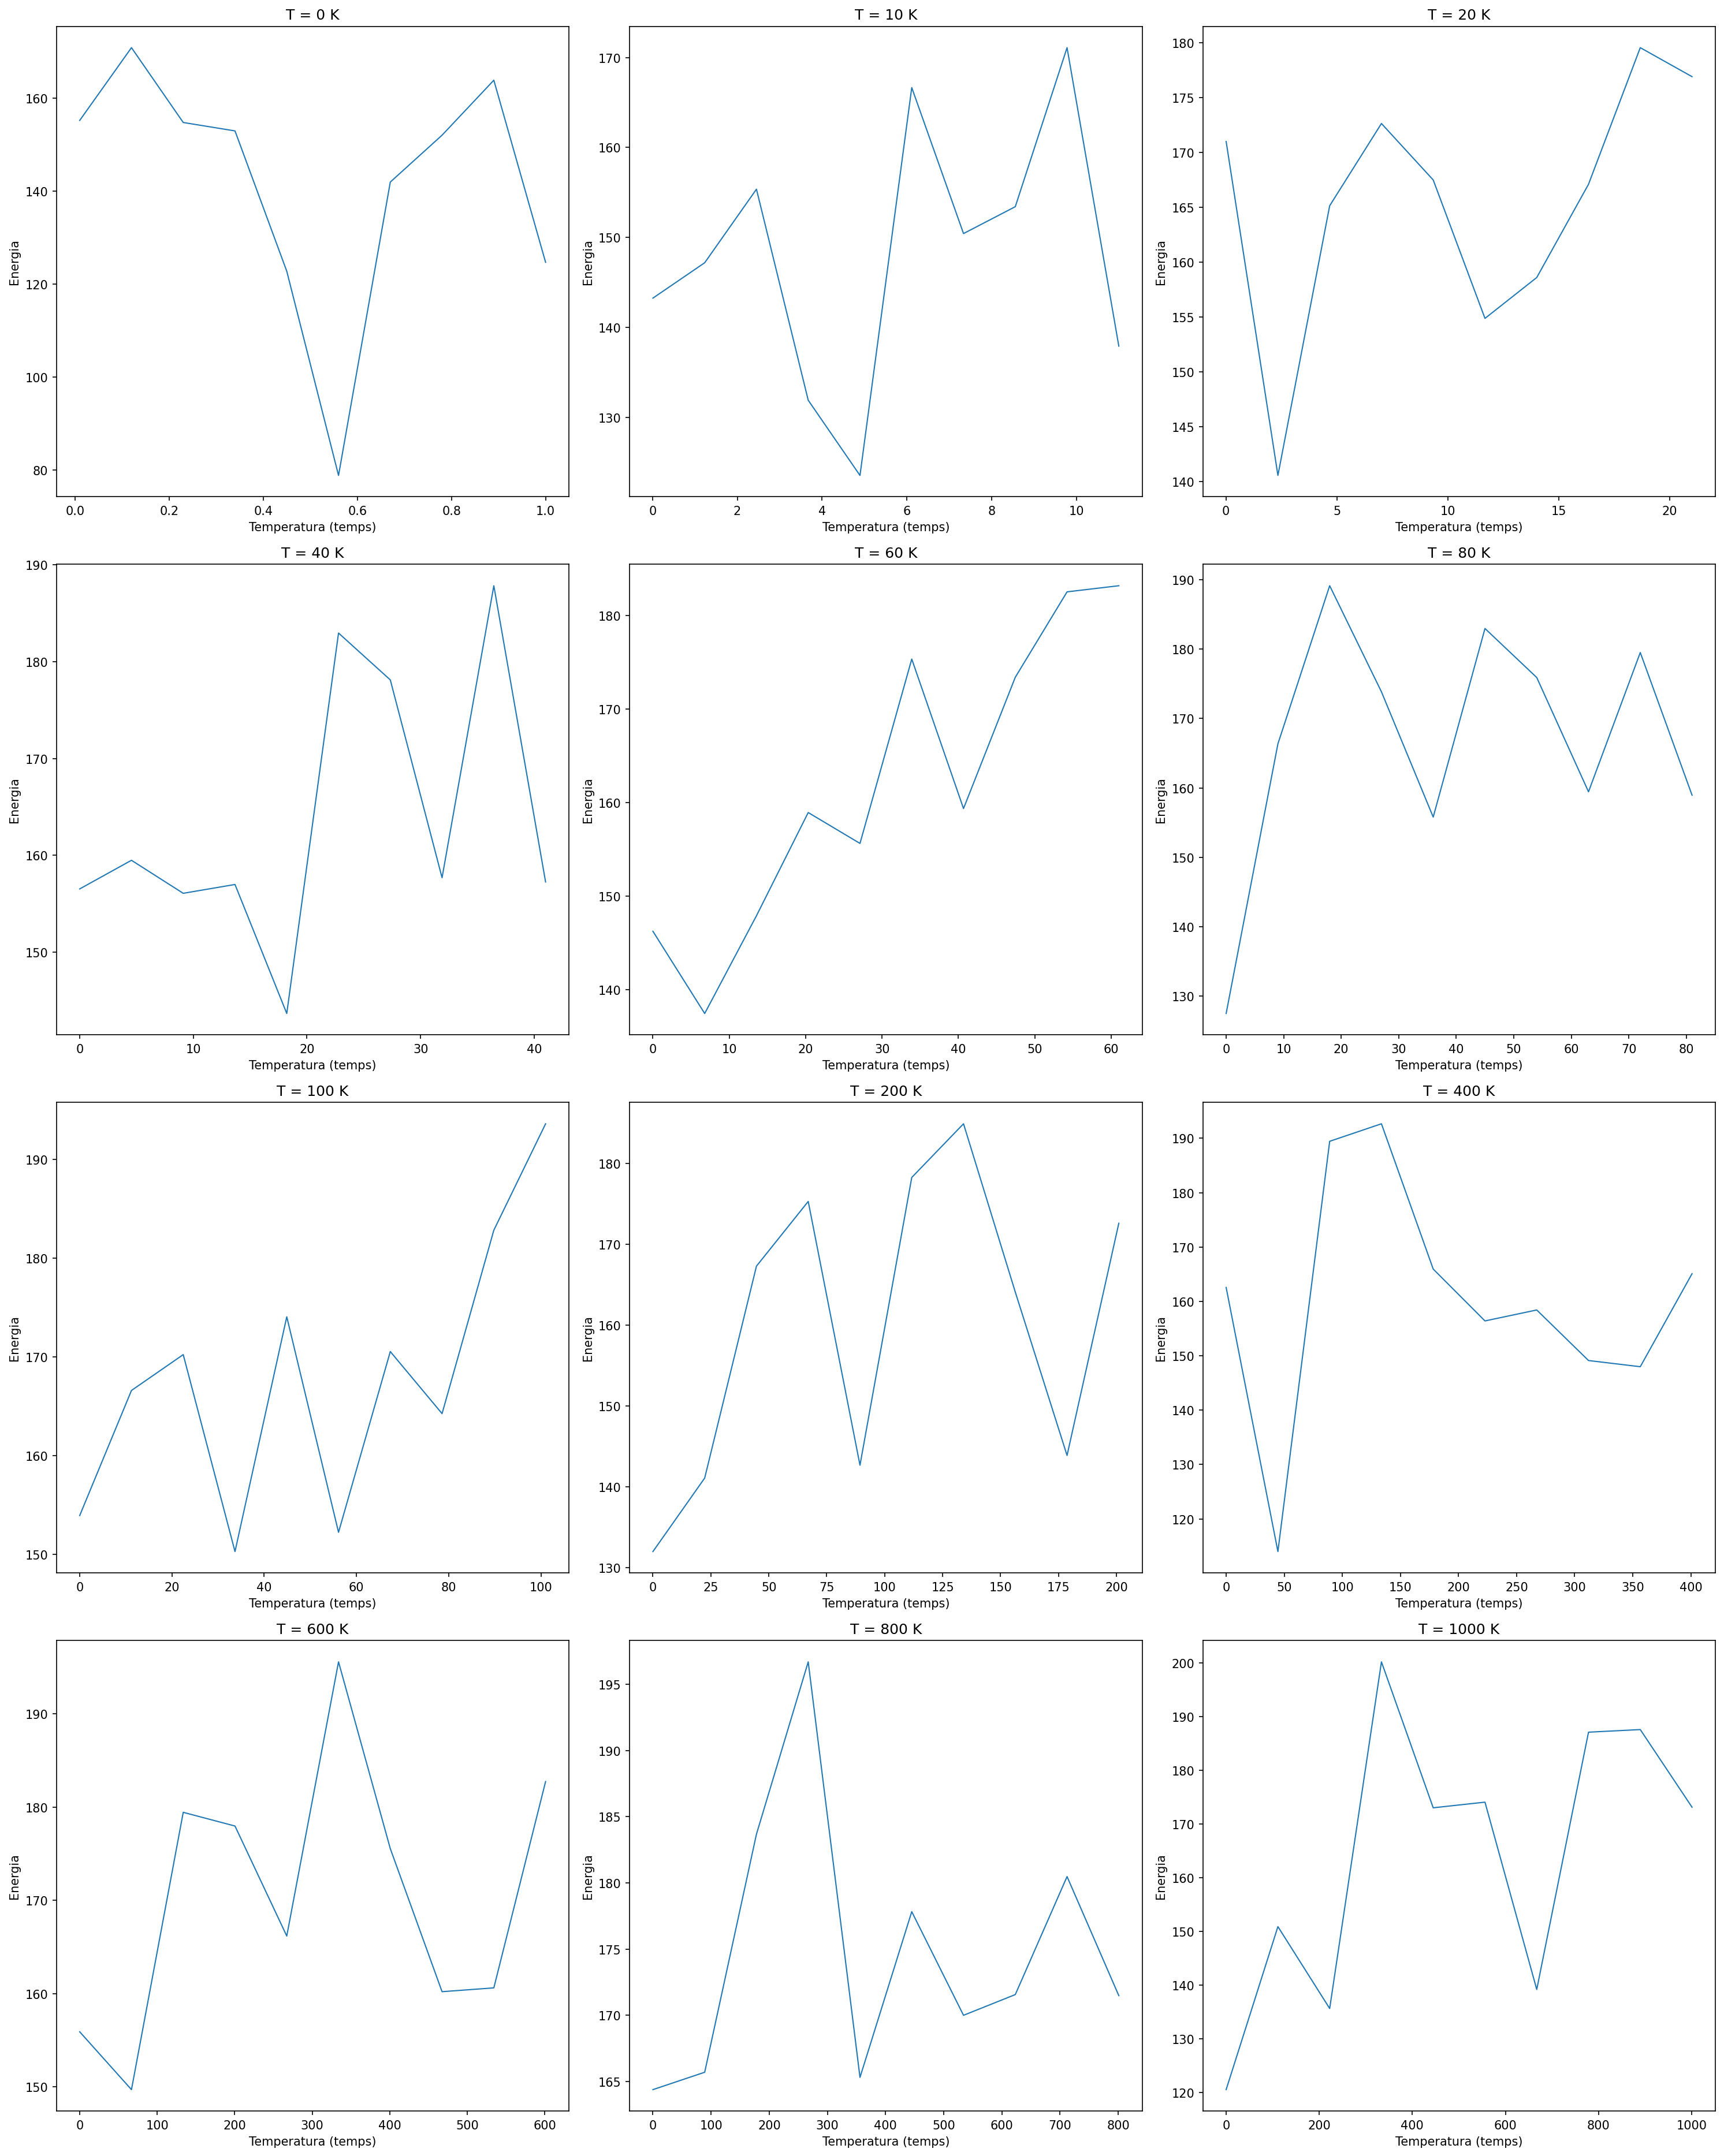

In [25]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [0, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000]
for temperatura in temperaturas:
    temps = np.linspace(0.01, temperatura+1, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=1, EAd=5, EBl=1, EBd=5)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

# Número de gráficos
num_plots = len(dict_energia)
linhas = 4
colunas = 3

fig, axs = plt.subplots(linhas, colunas, figsize=(20, 25), dpi=150)
axs = axs.flatten()

for i, temperatura in enumerate(dict_energia.keys()):
    
    # pegar temps e energia do dicionário
    temps = dict_temperatura[temperatura]
    energia = dict_energia[temperatura]
    
    # plota
    axs[i].plot(temps, energia, linewidth=1)
    axs[i].set_title(f"T = {temperatura} K")
    axs[i].set_xlabel("Temperatura (temps)")
    axs[i].set_ylabel("Energia")

# remover eixos vazios se tiver menos de 20 gráficos
for j in range(i+1, linhas * colunas):
    axs[j].axis("off")

plt.tight_layout()
plt.show()

# Energia de ligação diagonais=5 / frontais=1

### Temperatura: 1 -> 10

100%|██████████| 10/10 [15:40<00:00, 94.03s/it]


{10: [160.0752, 157.8937, 56.54725, 130.06745, 97.39705, 98.83385, 137.67535, 174.3631, 167.1017, 165.29565]}
{10: array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])}


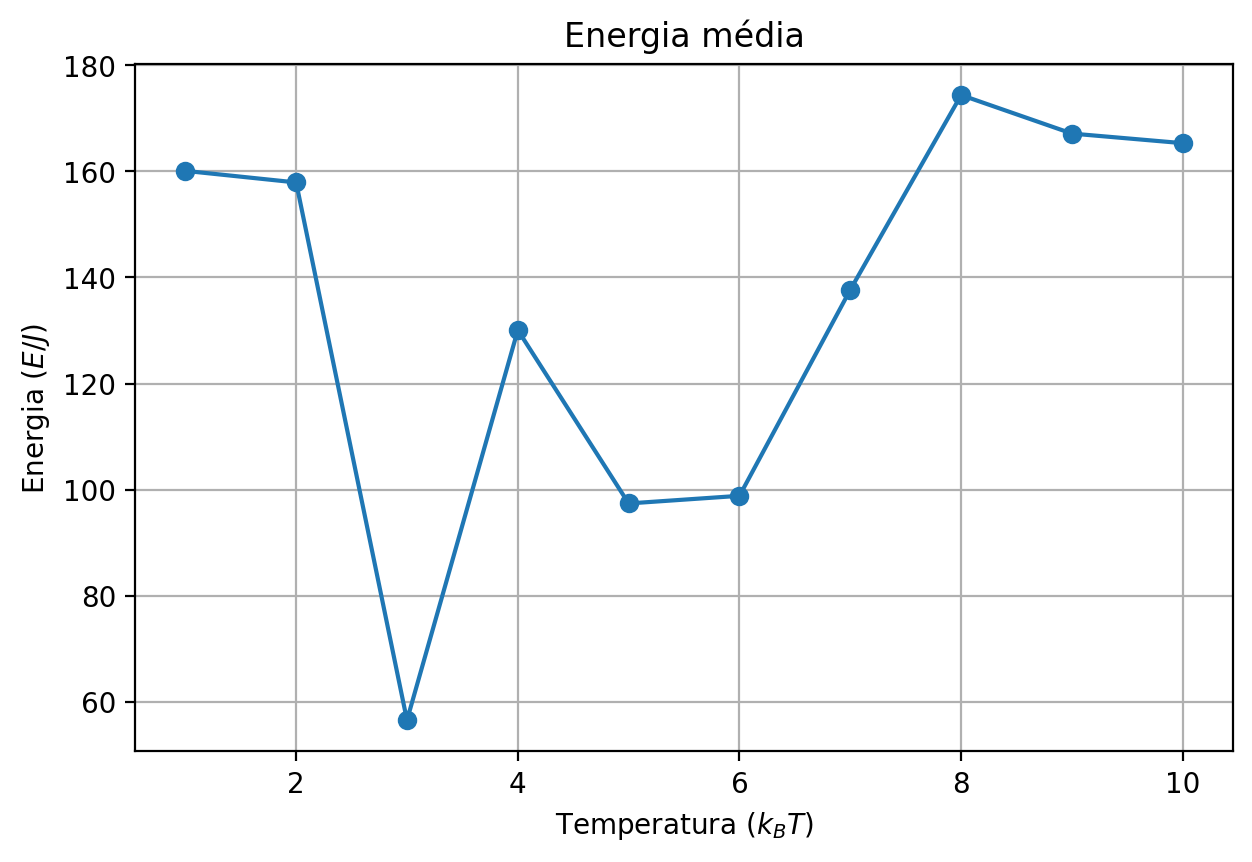

In [26]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [10]
for temperatura in temperaturas:
    temps = np.linspace(1, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=1, EAd=5, EBl=1, EBd=5)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[10], dict_energia[10], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()


### Temperatura 1 -> 5

100%|██████████| 10/10 [15:45<00:00, 94.51s/it]

{5: [125.95495, 175.463, 138.78675, 102.65255, 166.4965, 133.2786, 120.26275, 122.75175, 163.76145, 179.85335]}
{5: array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])}


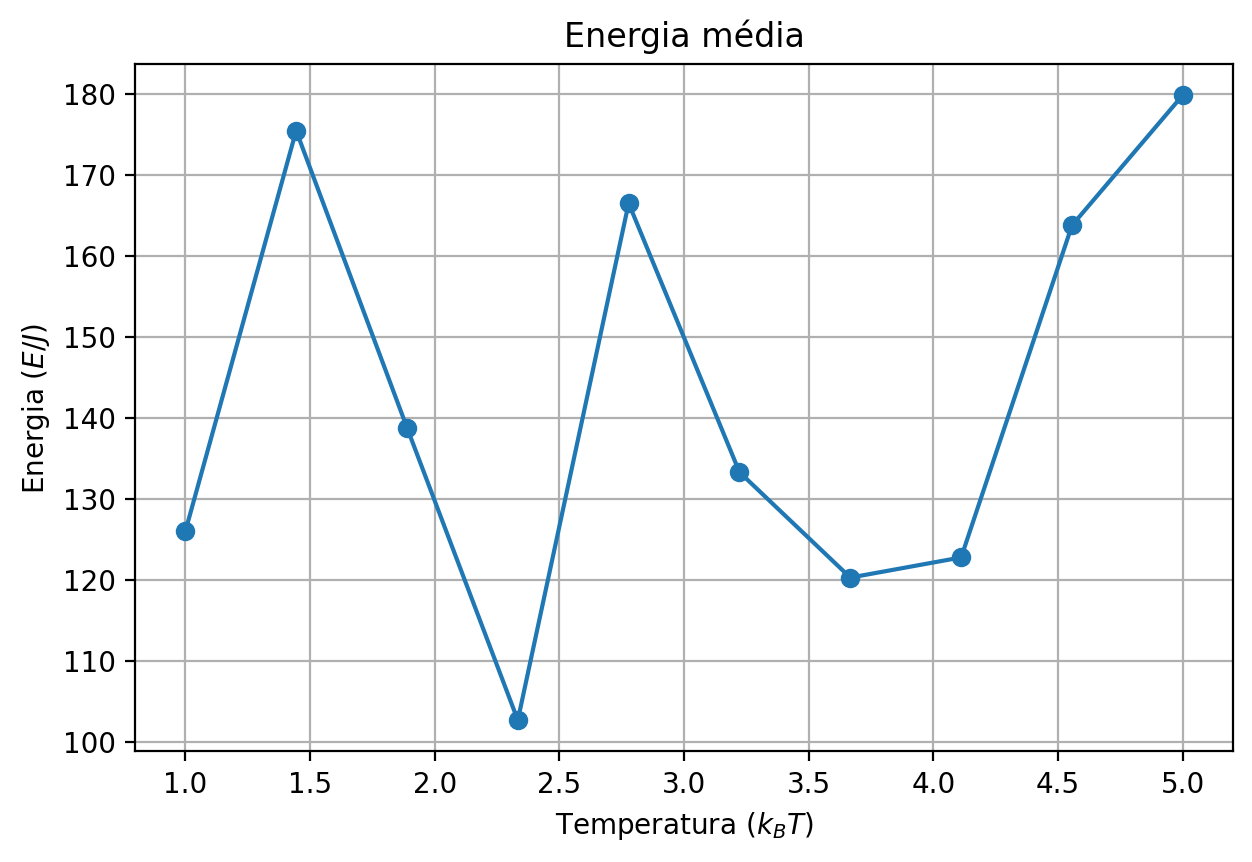

In [27]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [5]
for temperatura in temperaturas:
    temps = np.linspace(1, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=1, EAd=5, EBl=1, EBd=5)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[5], dict_energia[5], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

### Temperatura 5 -> 10

100%|██████████| 10/10 [15:52<00:00, 95.22s/it]

{10: [113.8887, 139.87015, 129.4234, 153.7589, 173.6518, 156.7071, 161.9198, 132.30205, 174.72245, 178.721]}
{10: array([ 5.        ,  5.55555556,  6.11111111,  6.66666667,  7.22222222,
        7.77777778,  8.33333333,  8.88888889,  9.44444444, 10.        ])}


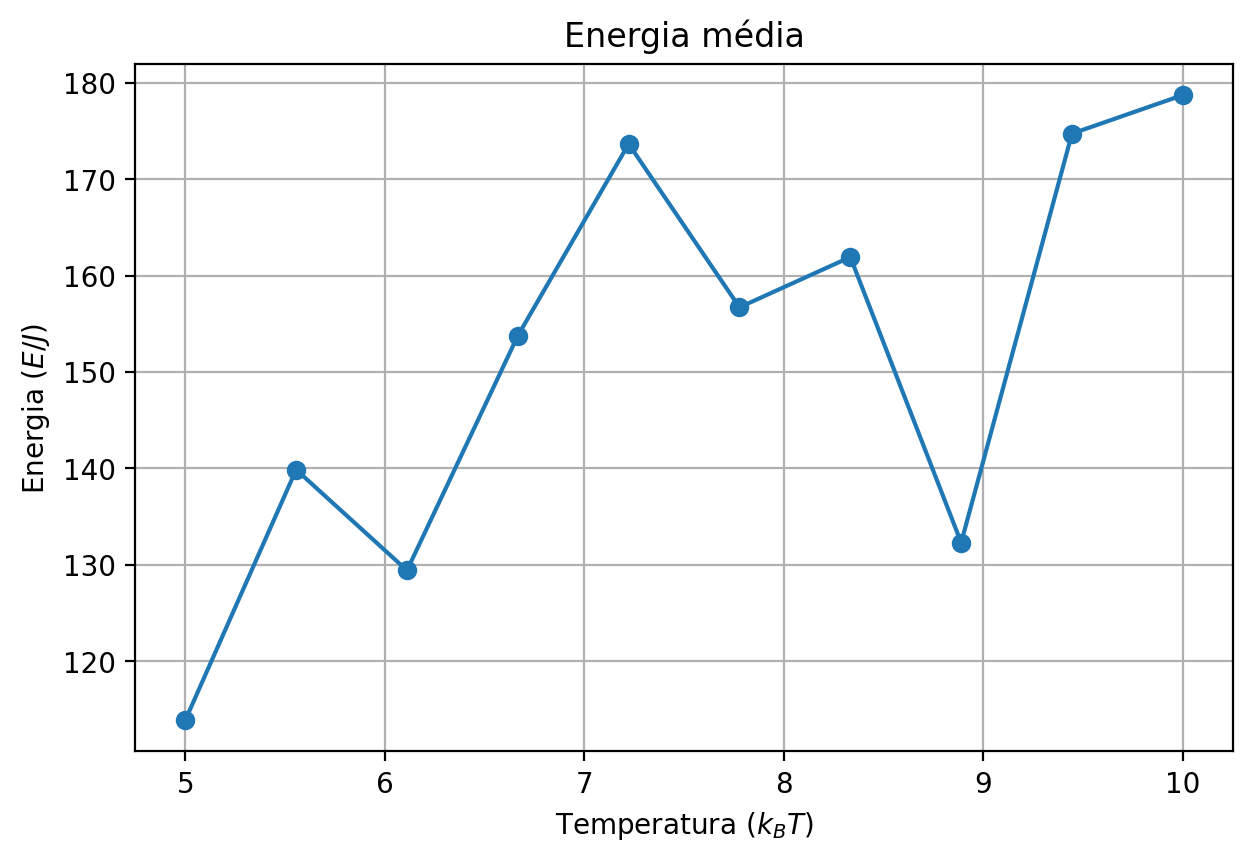

In [28]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [10]
for temperatura in temperaturas:
    temps = np.linspace(5, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=1, EAd=5, EBl=1, EBd=5)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[10], dict_energia[10], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

### Temperatura 4.8 -> 5.2

In [29]:
np.linspace(5, 10)

array([ 5.        ,  5.10204082,  5.20408163,  5.30612245,  5.40816327,
        5.51020408,  5.6122449 ,  5.71428571,  5.81632653,  5.91836735,
        6.02040816,  6.12244898,  6.2244898 ,  6.32653061,  6.42857143,
        6.53061224,  6.63265306,  6.73469388,  6.83673469,  6.93877551,
        7.04081633,  7.14285714,  7.24489796,  7.34693878,  7.44897959,
        7.55102041,  7.65306122,  7.75510204,  7.85714286,  7.95918367,
        8.06122449,  8.16326531,  8.26530612,  8.36734694,  8.46938776,
        8.57142857,  8.67346939,  8.7755102 ,  8.87755102,  8.97959184,
        9.08163265,  9.18367347,  9.28571429,  9.3877551 ,  9.48979592,
        9.59183673,  9.69387755,  9.79591837,  9.89795918, 10.        ])

100%|██████████| 10/10 [15:40<00:00, 94.09s/it]

{5.2: [148.9253, 103.6233, 145.4406, 155.1197, 164.106, 170.43225, 179.80835, 115.28955, 148.1609, 152.1267]}
{5.2: array([4.8       , 4.84444444, 4.88888889, 4.93333333, 4.97777778,
       5.02222222, 5.06666667, 5.11111111, 5.15555556, 5.2       ])}


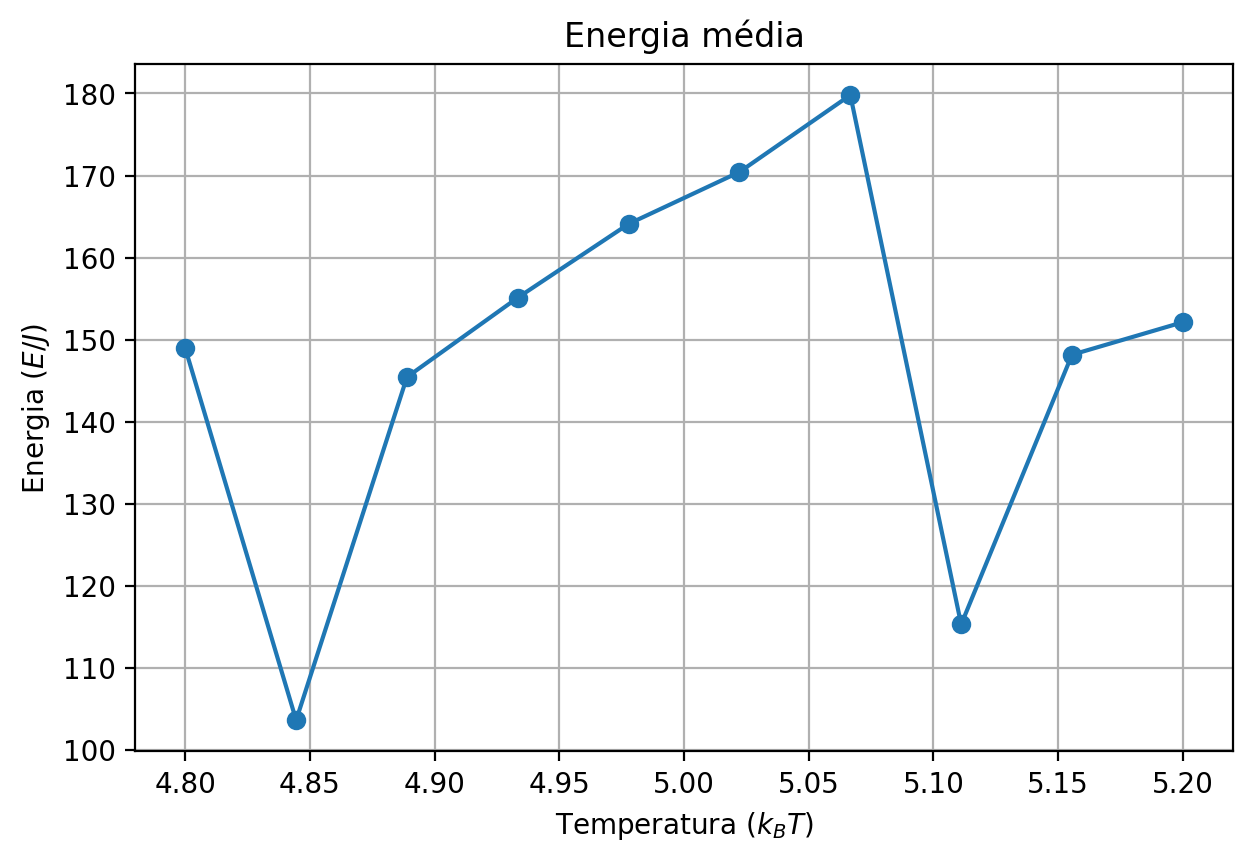

In [30]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [5.2]
for temperatura in temperaturas:
    temps = np.linspace(4.8, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=1, EAd=5, EBl=1, EBd=5)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[5.2], dict_energia[5.2], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

# Energias de ligação frontais=5 / diagonais=1

### Temperatura 1 -> 10

100%|██████████| 10/10 [15:48<00:00, 94.89s/it]


{10: [174.88985, 181.75815, 128.35745, 175.27765, 156.15375, 179.4914, 130.17035, 174.08795, 145.5942, 179.42725]}
{10: array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])}


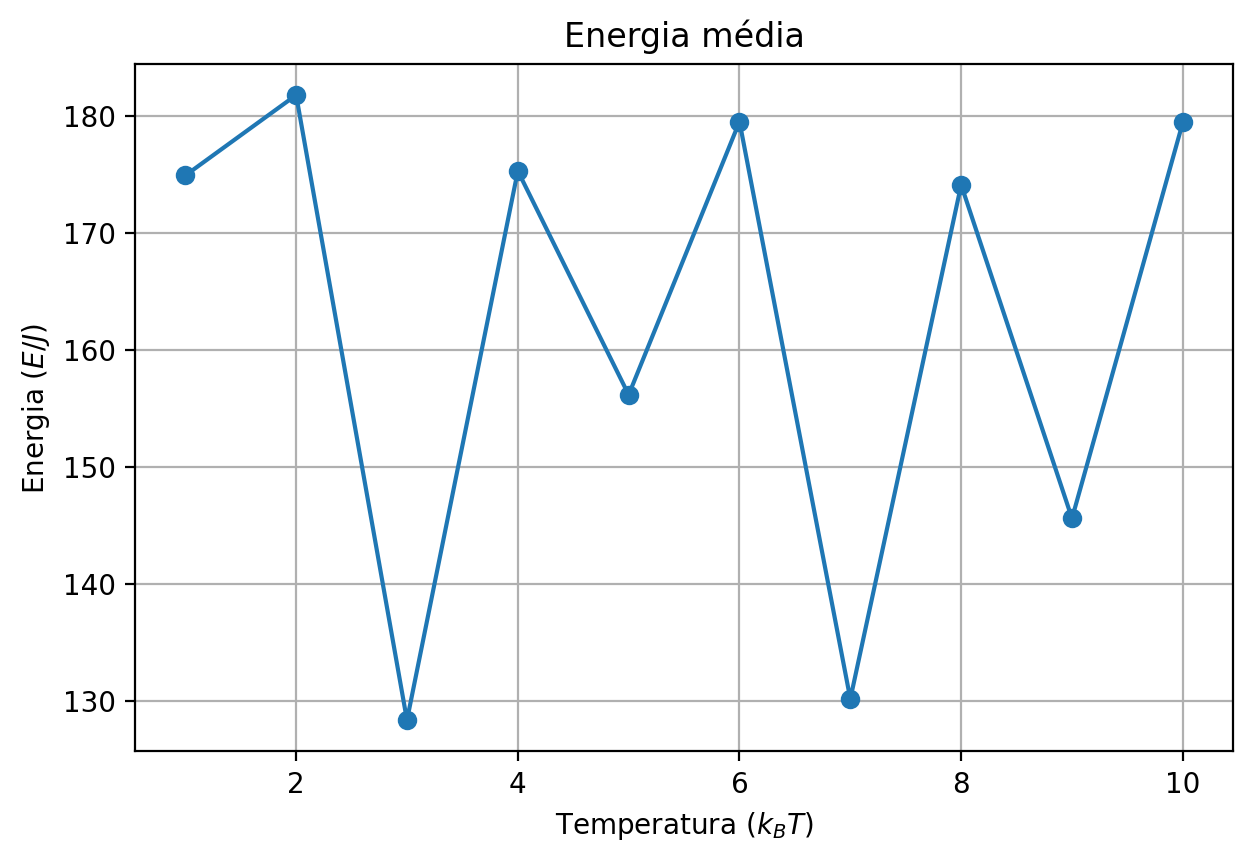

In [31]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [10]
for temperatura in temperaturas:
    temps = np.linspace(1, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=5, EAd=1, EBl=5, EBd=1)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[10], dict_energia[10], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()


### Temperatura 1 -> 5

100%|██████████| 10/10 [15:43<00:00, 94.36s/it]

{5: [121.1172, 158.9203, 172.90805, 162.7063, 118.06075, 176.1053, 96.9548, 89.64805, 154.11655, 185.2686]}
{5: array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])}


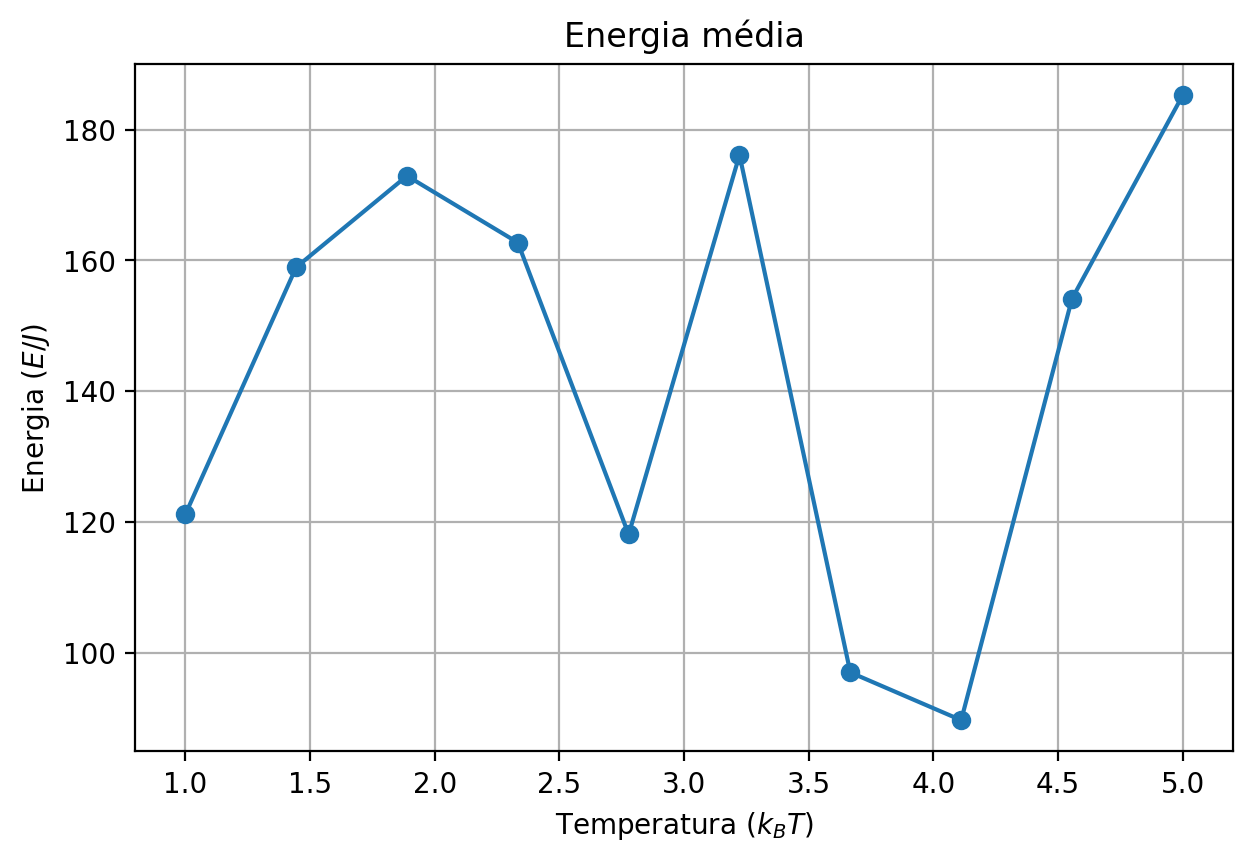

In [32]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [5]
for temperatura in temperaturas:
    temps = np.linspace(1, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                           EAl=5, EAd=1, EBl=5, EBd=1)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[5], dict_energia[5], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

### Temperatura 5 -> 10

100%|██████████| 10/10 [15:46<00:00, 94.67s/it]


{10: [174.91025, 191.2008, 172.5155, 167.94595, 136.8282, 126.06185, 177.49425, 175.43405, 156.7011, 188.7156]}
{10: array([ 5.        ,  5.55555556,  6.11111111,  6.66666667,  7.22222222,
        7.77777778,  8.33333333,  8.88888889,  9.44444444, 10.        ])}


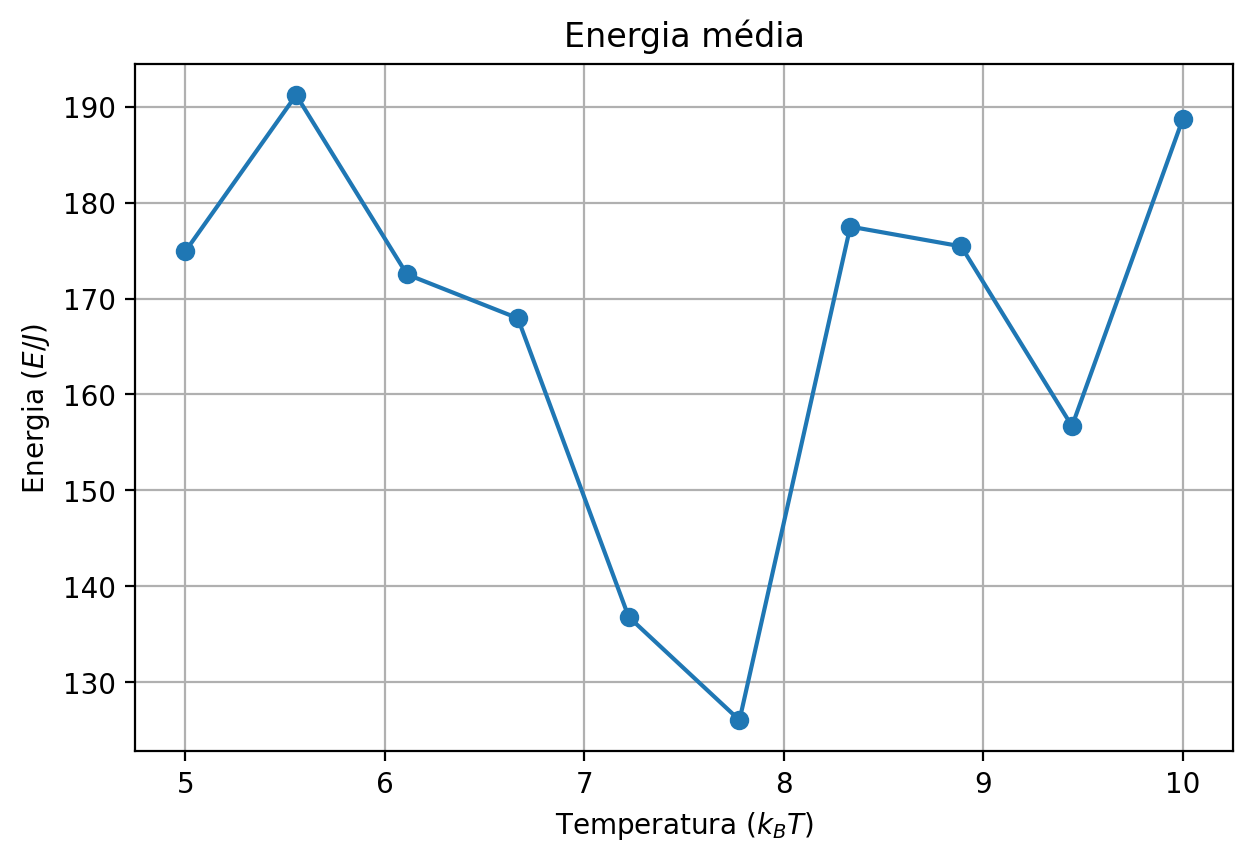

In [33]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [10]
for temperatura in temperaturas:
    temps = np.linspace(5, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=5, EAd=1, EBl=5, EBd=1)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[10], dict_energia[10], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

### Temperatura 4.8-> 5.2

100%|██████████| 10/10 [15:42<00:00, 94.27s/it]

{5.2: [178.20645, 173.90615, 120.7149, 149.9561, 142.56685, 165.4357, 179.4563, 176.8338, 158.5662, 184.3355]}
{5.2: array([4.8       , 4.84444444, 4.88888889, 4.93333333, 4.97777778,
       5.02222222, 5.06666667, 5.11111111, 5.15555556, 5.2       ])}


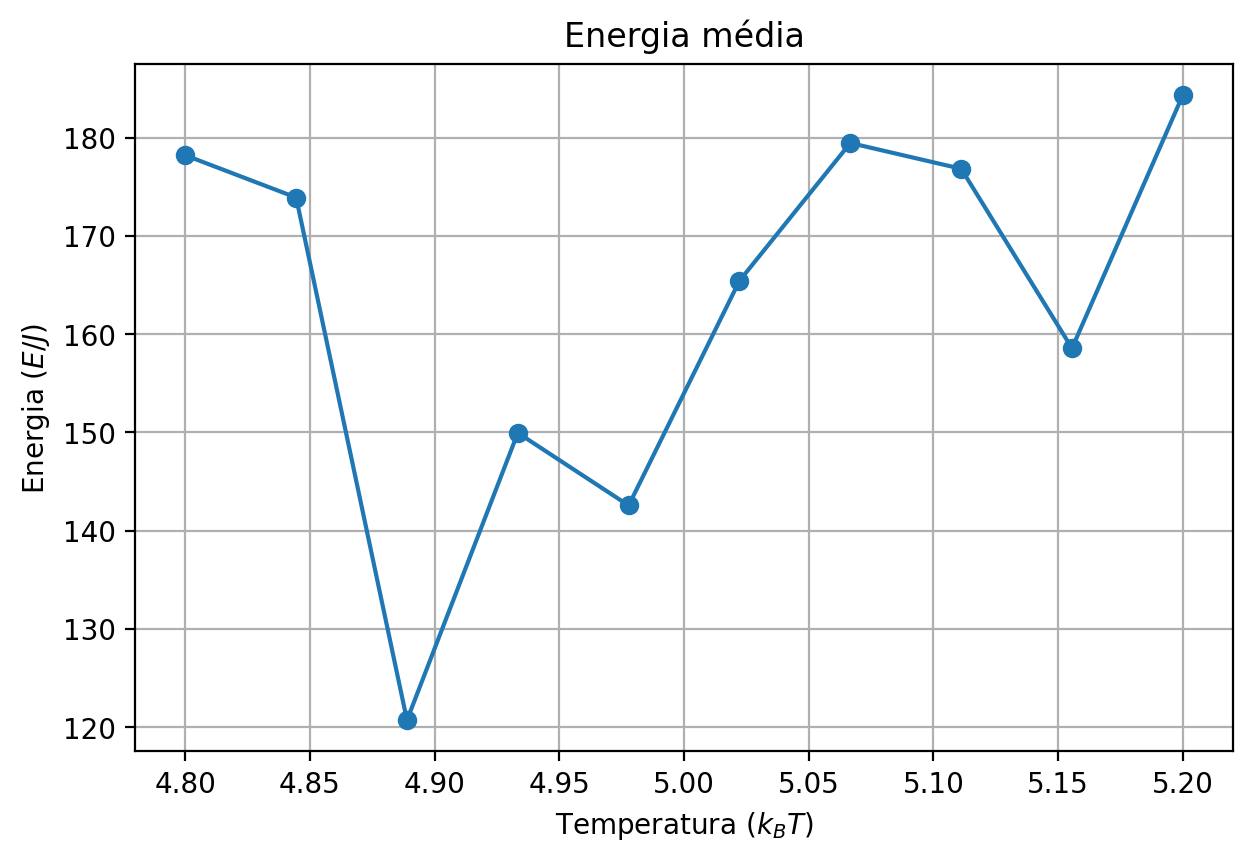

In [34]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [5.2]
for temperatura in temperaturas:
    temps = np.linspace(4.8, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=5, EAd=1, EBl=5, EBd=1)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[5.2], dict_energia[5.2], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

# Energia de ligação diagonal = 0 / frontal = 5

### Temperatura: 1 -> 10

100%|██████████| 10/10 [1:13:49<00:00, 442.92s/it]


{10: [147.168, 161.2927, 171.00145, 159.33555, 186.917, 150.2319, 181.81595, 160.63935, 181.67295, 168.84375]}
{10: array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])}


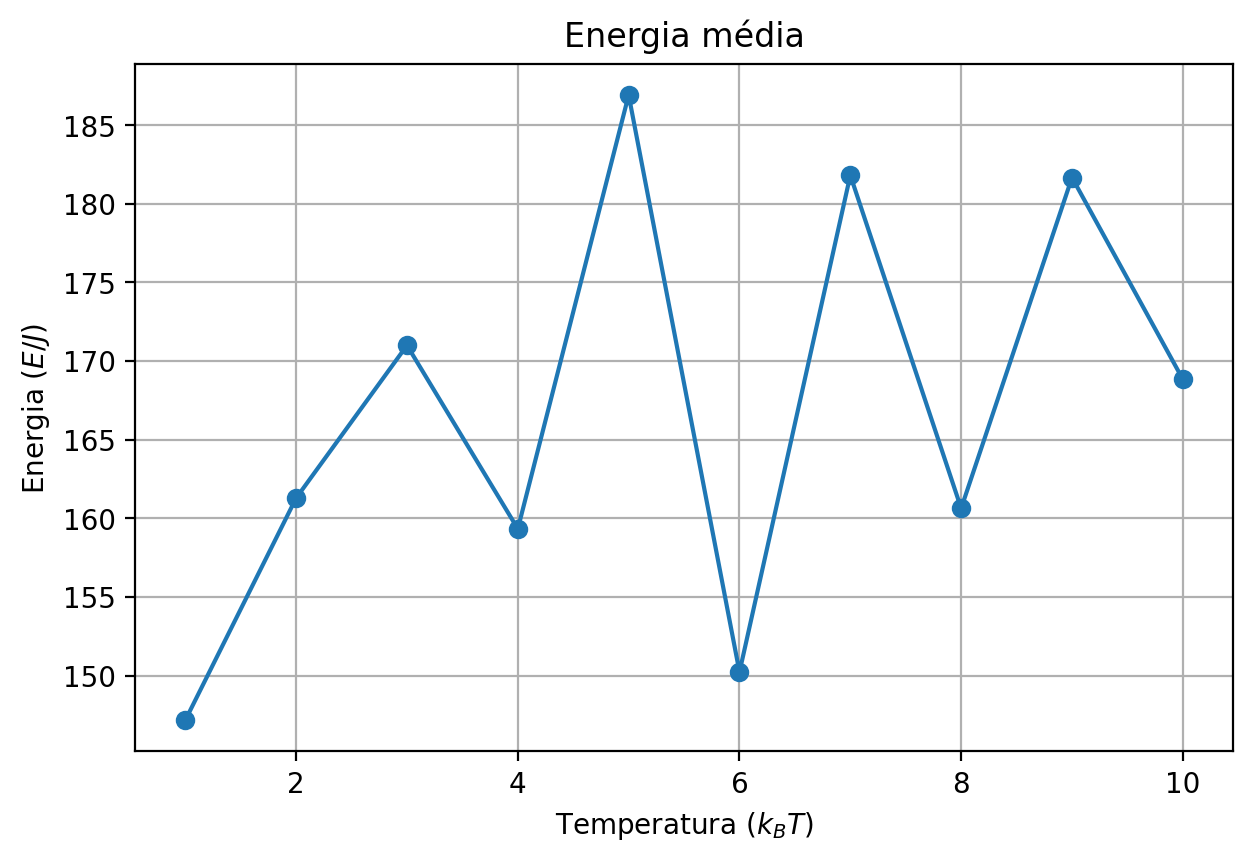

In [43]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [10]
for temperatura in temperaturas:
    temps = np.linspace(1, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=100_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=5, EAd=0, EBl=5, EBd=0)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[10], dict_energia[10], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

### Temperatura: 1 -> 5

100%|██████████| 10/10 [15:48<00:00, 94.89s/it]

{5: [169.91395, 113.30645, 94.4277, 177.88765, 173.5725, 116.0536, 143.0523, 171.1279, 134.2798, 130.78675]}
{5: array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])}


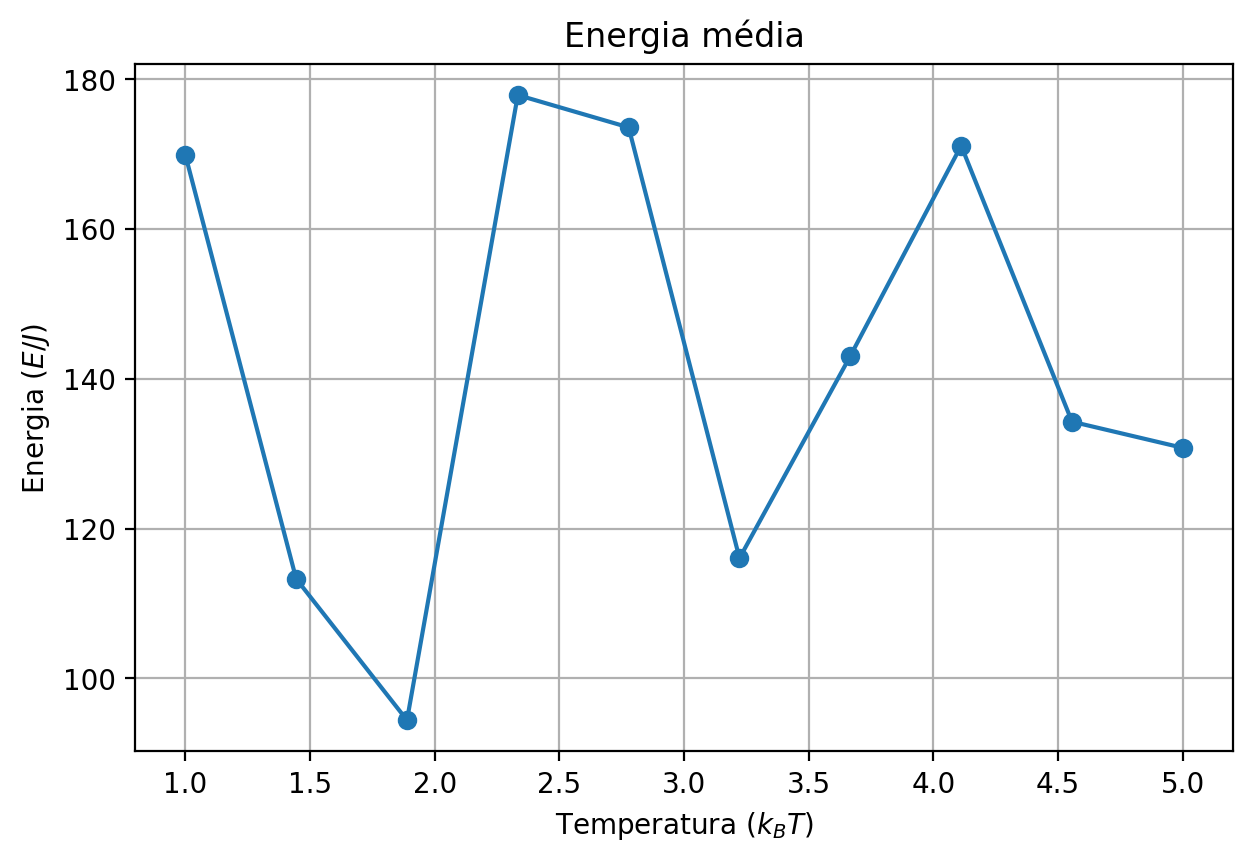

In [36]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [5]
for temperatura in temperaturas:
    temps = np.linspace(1, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                           EAl=5, EAd=0, EBl=5, EBd=0)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[5], dict_energia[5], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

### Temperatura: 5 -> 10

100%|██████████| 10/10 [15:51<00:00, 95.18s/it]


{10: [175.7427, 155.13535, 160.25205, 183.4069, 177.8346, 177.89505, 180.2623, 167.1959, 157.51645, 165.3308]}
{10: array([ 5.        ,  5.55555556,  6.11111111,  6.66666667,  7.22222222,
        7.77777778,  8.33333333,  8.88888889,  9.44444444, 10.        ])}


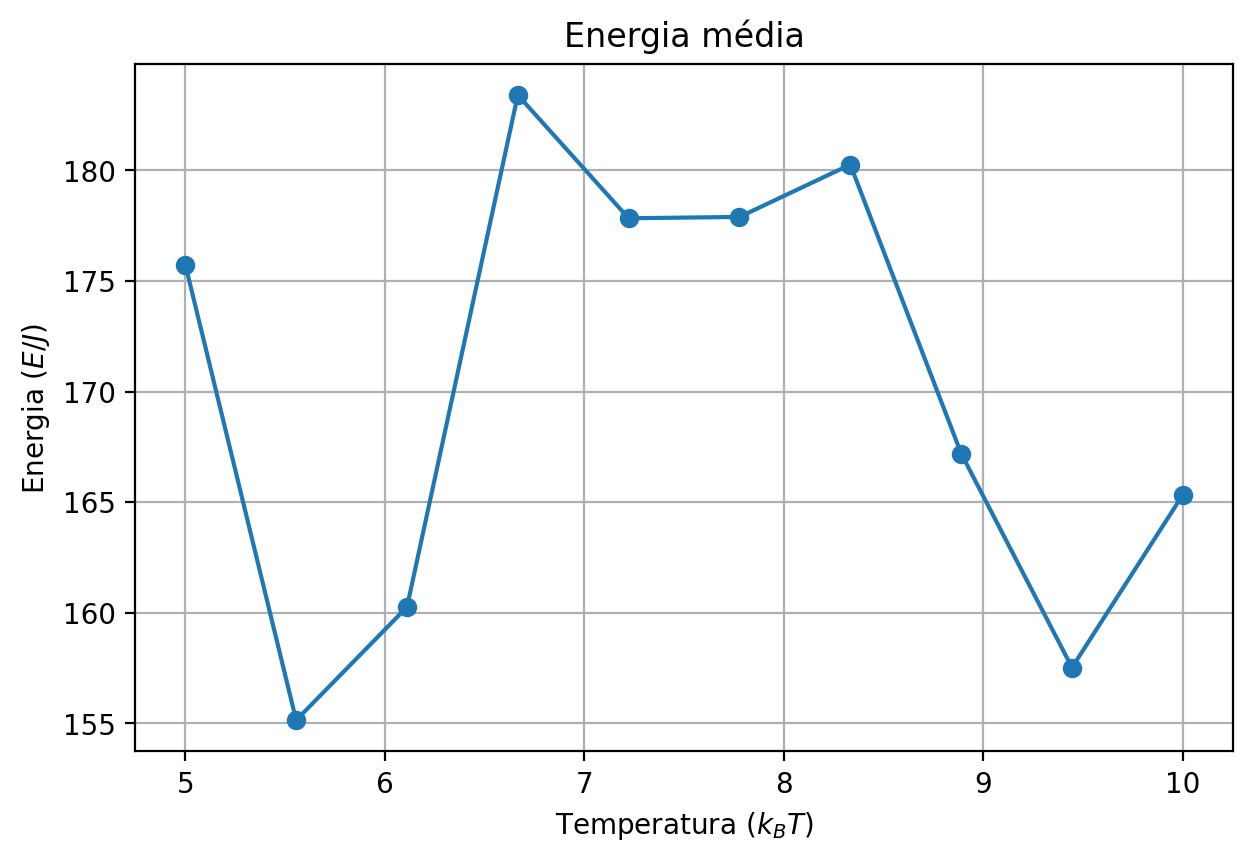

In [37]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [10]
for temperatura in temperaturas:
    temps = np.linspace(5, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=5, EAd=0, EBl=5, EBd=0)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[10], dict_energia[10], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

### Temperatura: 4.8 -> 5.2

100%|██████████| 10/10 [15:52<00:00, 95.24s/it]

{5.2: [146.5261, 173.06055, 148.63205, 143.98005, 162.41105, 182.8842, 170.43105, 135.2849, 127.96785, 163.0977]}
{5.2: array([4.8       , 4.84444444, 4.88888889, 4.93333333, 4.97777778,
       5.02222222, 5.06666667, 5.11111111, 5.15555556, 5.2       ])}


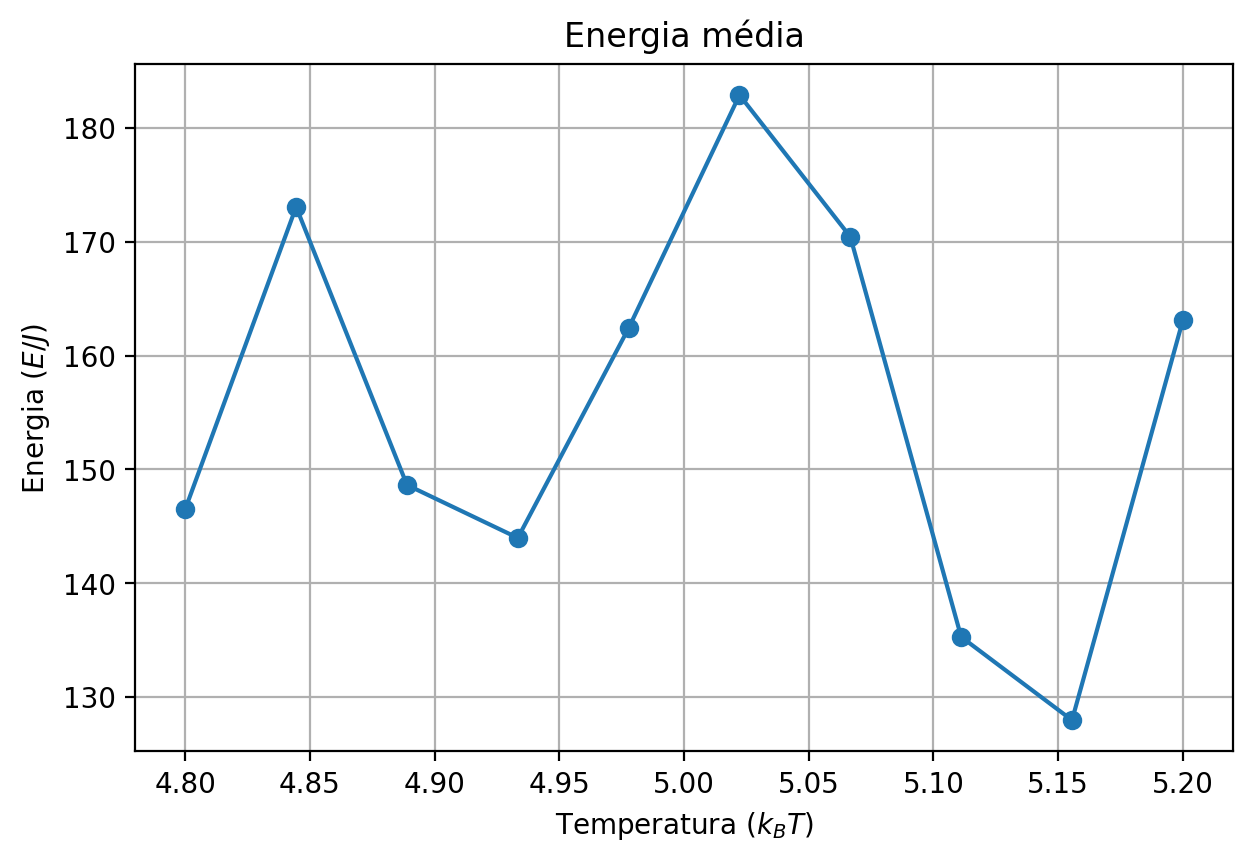

In [38]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [5.2]
for temperatura in temperaturas:
    temps = np.linspace(4.8, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=5, EAd=0, EBl=5, EBd=0)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[5.2], dict_energia[5.2], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

# Energia de ligação diagonal = 5 / frontal = 0

### Temperatura: 1 -> 10

100%|██████████| 10/10 [15:54<00:00, 95.46s/it]


{10: [89.8291, 155.50085, 150.96905, 121.13325, 145.3397, 132.708, 142.21535, 167.87685, 173.2672, 168.47205]}
{10: array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])}


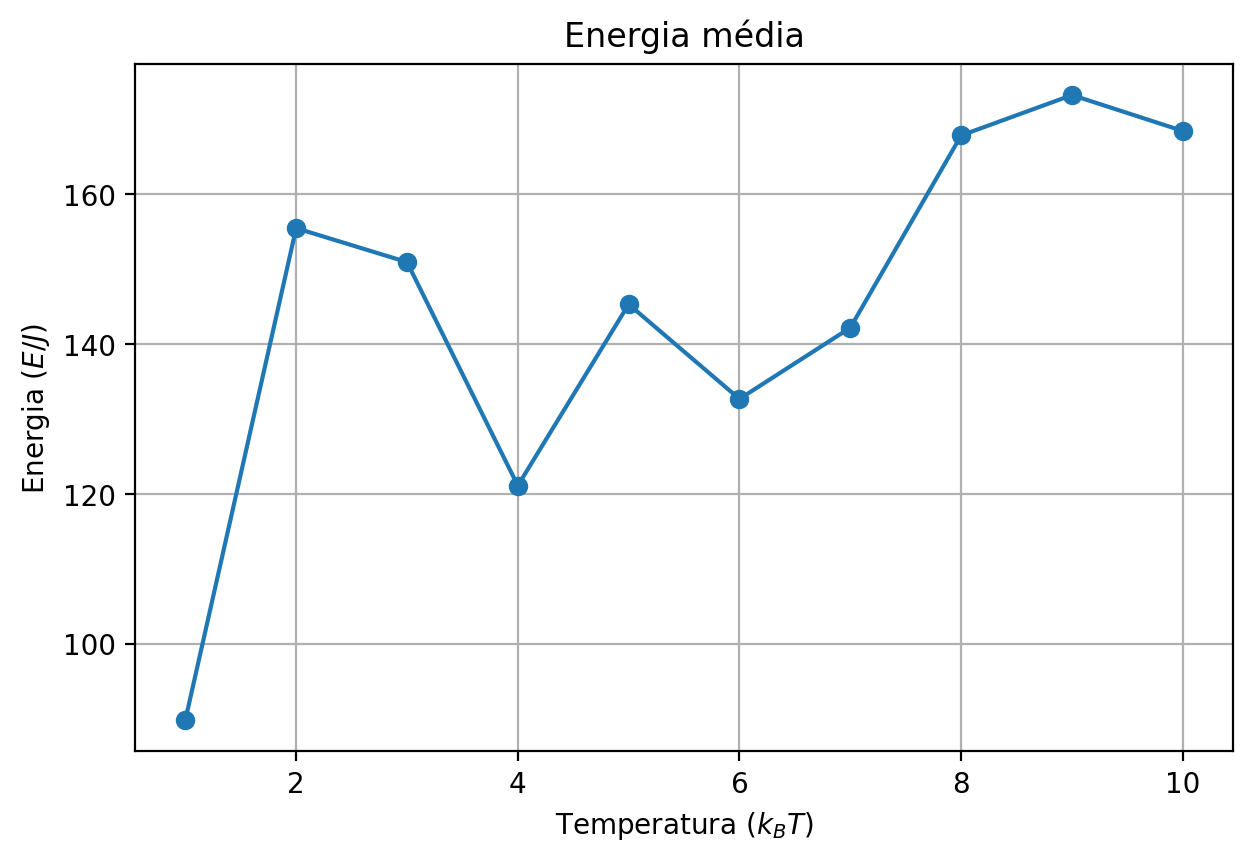

In [39]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [10]
for temperatura in temperaturas:
    temps = np.linspace(1, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=0, EAd=5, EBl=0, EBd=5)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[10], dict_energia[10], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

### Temperatura: 1 -> 5

100%|██████████| 10/10 [15:48<00:00, 94.83s/it]

{5: [127.94665, 140.6922, 150.5916, 169.63185, 160.8461, 166.0459, 143.75405, 157.71575, 164.64865, 178.44355]}
{5: array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])}


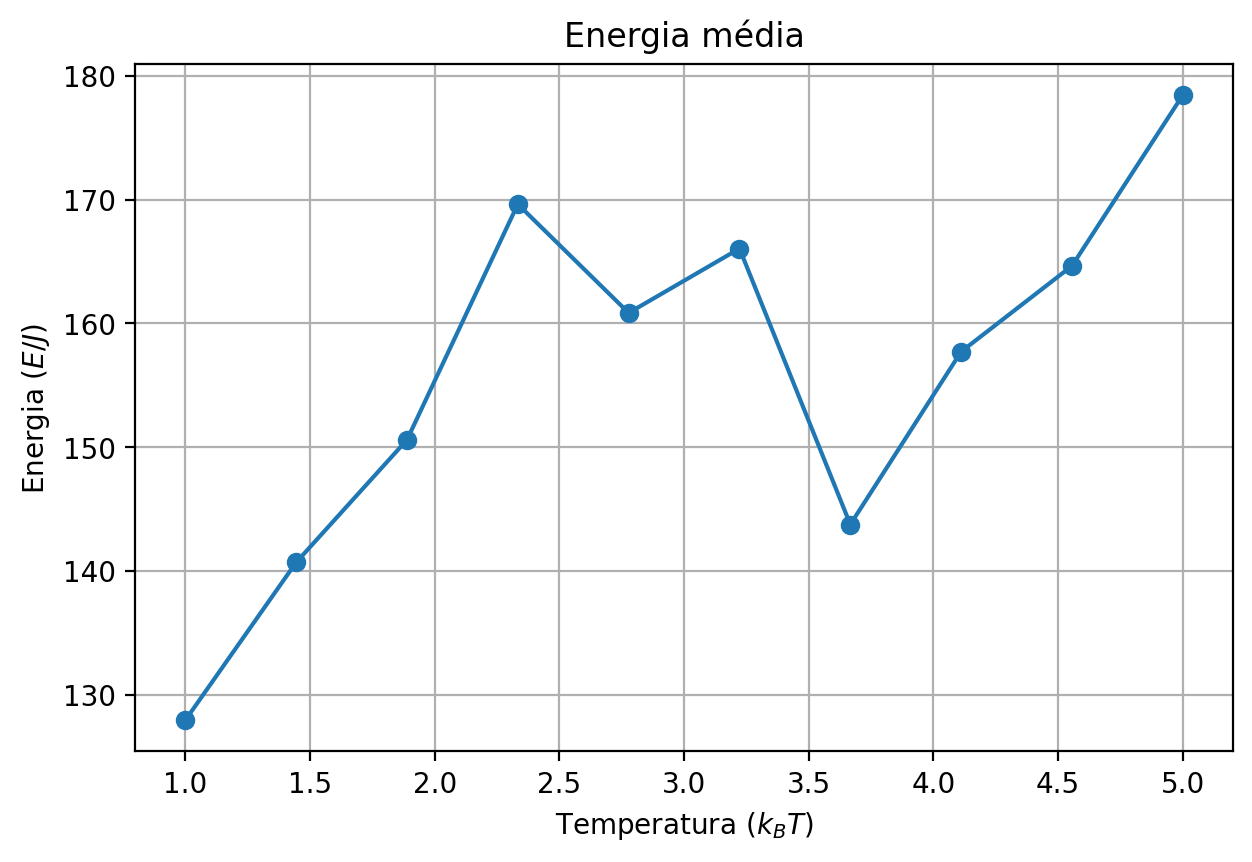

In [40]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [5]
for temperatura in temperaturas:
    temps = np.linspace(1, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                           EAl=0, EAd=5, EBl=0, EBd=5)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[5], dict_energia[5], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

### Temperatura: 5 -> 10

100%|██████████| 10/10 [15:58<00:00, 95.87s/it]


{10: [146.5046, 150.29315, 175.37095, 151.5106, 146.58275, 144.66465, 142.8185, 162.65505, 152.6086, 159.83955]}
{10: array([ 5.        ,  5.55555556,  6.11111111,  6.66666667,  7.22222222,
        7.77777778,  8.33333333,  8.88888889,  9.44444444, 10.        ])}


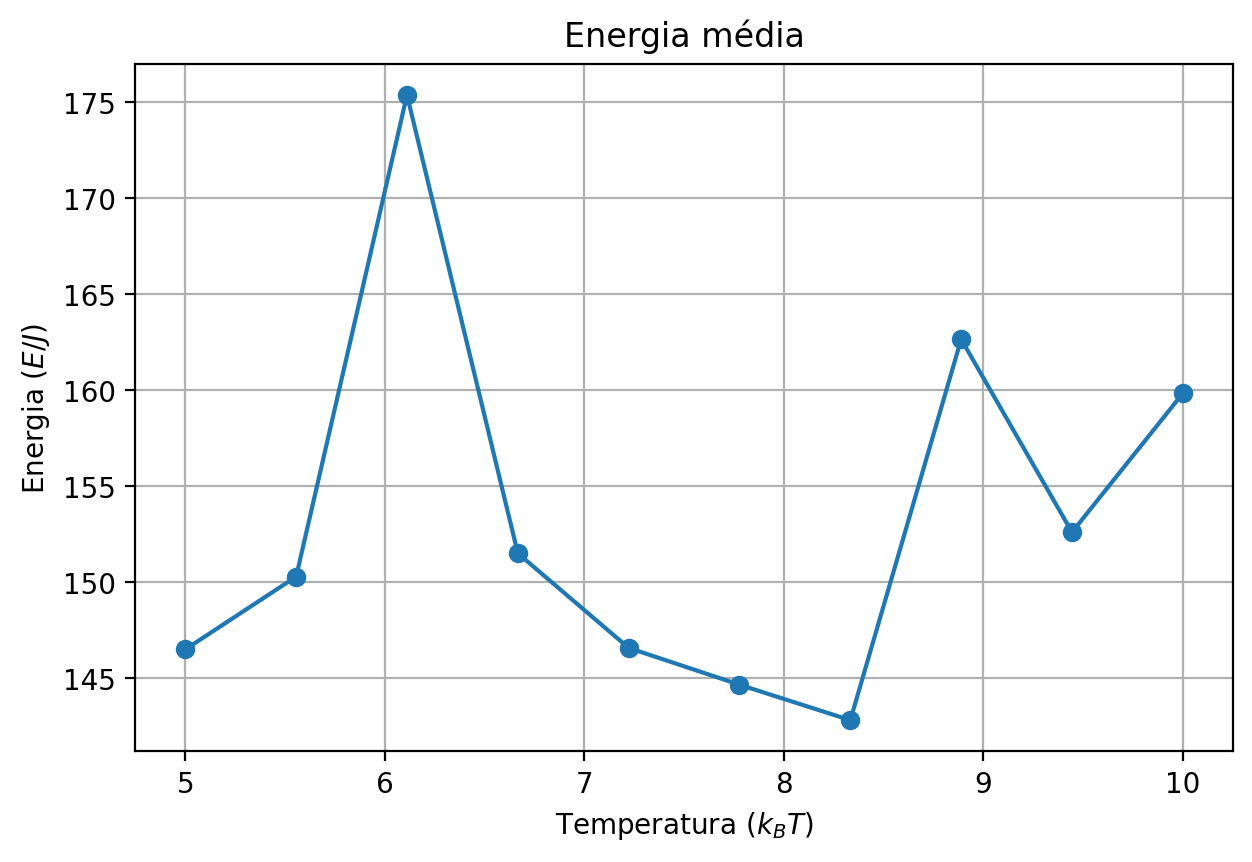

In [41]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [10]
for temperatura in temperaturas:
    temps = np.linspace(5, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=0, EAd=5, EBl=0, EBd=5)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[10], dict_energia[10], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

### Temperatura: 4.8 -> 5.2

100%|██████████| 10/10 [15:42<00:00, 94.22s/it]

{5.2: [151.9907, 128.5014, 174.7357, 161.83535, 170.28555, 139.1593, 173.38605, 161.8988, 140.54835, 120.2306]}
{5.2: array([4.8       , 4.84444444, 4.88888889, 4.93333333, 4.97777778,
       5.02222222, 5.06666667, 5.11111111, 5.15555556, 5.2       ])}


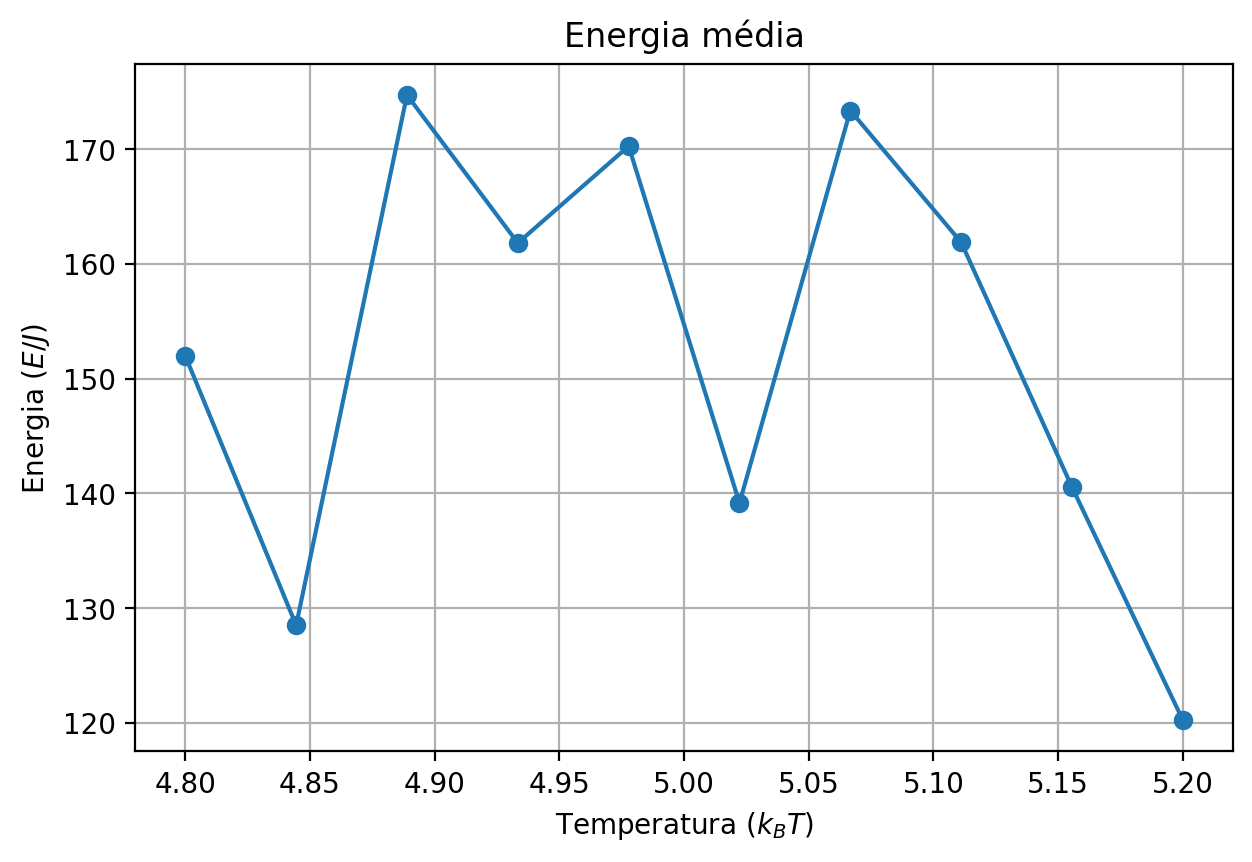

In [42]:
#############
# Constantes

TAMANHO_REDE_X=12
TAMANHO_REDE_Y=12
NUMERO_DE_POLIMEROS=10
TAMANHO_DO_POLIMERO=10

#############

dict_energia = {}
dict_temperatura = {}
temperaturas = [5.2]
for temperatura in temperaturas:
    temps = np.linspace(4.8, temperatura, 10)
    energia_media  = simular(
                            TAMANHO_REDE_X=TAMANHO_REDE_X, 
                            TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                            NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                            TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                            temps = temps,
                            equil_steps=10_000, 
                            prod_steps=10_000,
                            MAX_TENTATIVAS=10_000,
                            EAl=0, EAd=5, EBl=0, EBd=5)
    
    dict_energia[temperatura] = energia_media
    dict_temperatura[temperatura] = temps
print(dict_energia)
print(dict_temperatura)

plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(2, 2, 1)
plt.plot(dict_temperatura[5.2], dict_energia[5.2], '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()